# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

import yfinance as yf
import seaborn as sns



# Load and Convert DataSet

In [2]:
tck = yf.Ticker("INTC")
start_Data = "1995-08-1"

df = tck.history(start = start_Data, end = None)
df

Open       High        Low      Close  \
Date                                                                    
1995-08-01 00:00:00-04:00   4.579953   4.579953   4.403801   4.456646   
1995-08-02 00:00:00-04:00   4.535915   4.579953   4.298110   4.333340   
1995-08-03 00:00:00-04:00   4.210032   4.421415   4.165994   4.377377   
1995-08-04 00:00:00-04:00   4.386182   4.439027   4.350951   4.368567   
1995-08-07 00:00:00-04:00   4.403803   4.500686   4.386188   4.474264   
...                              ...        ...        ...        ...   
2025-08-01 00:00:00-04:00  19.500000  19.549999  18.969999  19.309999   
2025-08-04 00:00:00-04:00  19.520000  19.590000  19.350000  19.500000   
2025-08-05 00:00:00-04:00  19.700001  20.540001  19.680000  20.190001   
2025-08-06 00:00:00-04:00  20.120001  20.480000  19.870001  20.410000   
2025-08-07 00:00:00-04:00  19.990000  20.440001  19.910000  19.945000   

                              Volume  Dividends  Stock Splits  
Date                                                           
1995-08-01 00:00:00-04:00   94556800        0.0           0.0  
1995-08-02 00:00:00-04:00  135620800        0.0           0.0  
1995-08-03 00:00:00-04:00  117961600        0.0           0.0  
1995-08-04 00:00:00-04:00   68723200        0.0           0.0  
1995-08-07 00:00:00-04:00   51580000        0.0           0.0  
...                              ...        ...           ...  
2025-08-01 00:00:00-04:00   86496100        0.0           0.0  
2025-08-04 00:00:00-04:00   69249400        0.0           0.0  
2025-08-05 00:00:00-04:00   97338200        0.0           0.0  
2025-08-06 00:00:00-04:00   65327400        0.0           0.0  
2025-08-07 00:00:00-04:00   43007199        0.0           0.0  

[7555 rows x 7 columns]

In [3]:
col_close = df.pop("Close")
df.insert(0, "Close", col_close)
df.head()

Close      Open      High       Low     Volume  \
Date                                                                           
1995-08-01 00:00:00-04:00  4.456646  4.579953  4.579953  4.403801   94556800   
1995-08-02 00:00:00-04:00  4.333340  4.535915  4.579953  4.298110  135620800   
1995-08-03 00:00:00-04:00  4.377377  4.210032  4.421415  4.165994  117961600   
1995-08-04 00:00:00-04:00  4.368567  4.386182  4.439027  4.350951   68723200   
1995-08-07 00:00:00-04:00  4.474264  4.403803  4.500686  4.386188   51580000   

                           Dividends  Stock Splits  
Date                                                
1995-08-01 00:00:00-04:00        0.0           0.0  
1995-08-02 00:00:00-04:00        0.0           0.0  
1995-08-03 00:00:00-04:00        0.0           0.0  
1995-08-04 00:00:00-04:00        0.0           0.0  
1995-08-07 00:00:00-04:00        0.0           0.0

In [4]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
columns = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]

## Data Preprocessing

In [6]:
def check_df(df: object, head: object=5) -> object:
    print("\nShape of data frame")
    print(df.shape)
    print("\nTypes of data frame")
    print(df.dtypes)
    print("\nNaN values")
    print(df.isnull().sum())
    print("\nInfomation of data frame")
    print(df.info())

check_df(df)


Shape of data frame
(7555, 7)

Types of data frame
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NaN values
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Infomation of data frame
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7555 entries, 1995-08-01 00:00:00-04:00 to 2025-08-07 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         7555 non-null   float64
 1   Open          7555 non-null   float64
 2   High          7555 non-null   float64
 3   Low           7555 non-null   float64
 4   Volume        7555 non-null   int64  
 5   Dividends     7555 non-null   float64
 6   Stock Splits  7555 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 472.2

In [7]:
df["Volume"] = df["Volume"].astype("float64")

In [8]:
#Check the duplicated row
print("Number of duplicated rows: ", len(df[df.duplicated()]))

Number of duplicated rows:  0


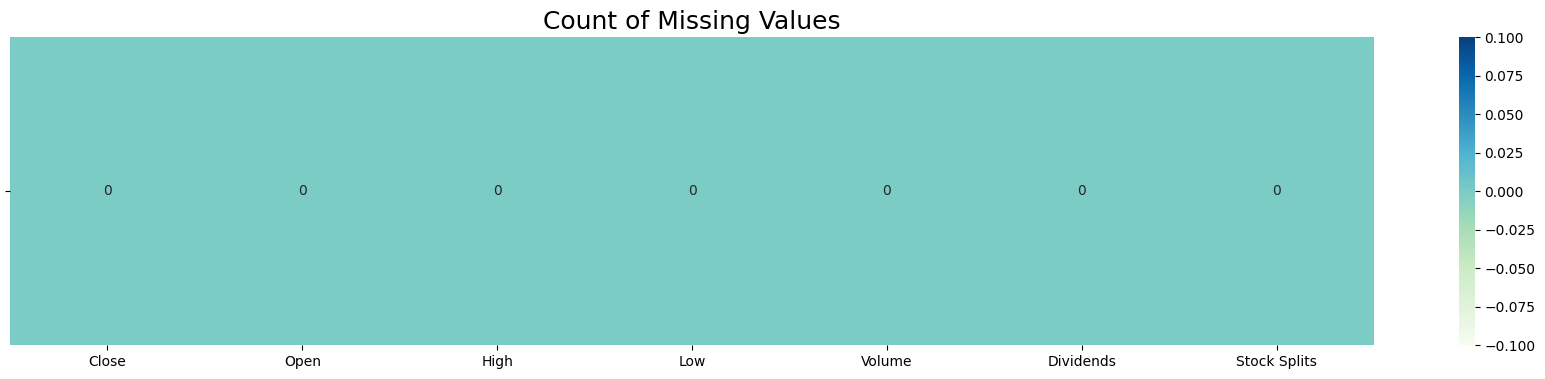

In [9]:
# Count the missing values by columns
plt.figure(figsize = (22, 4))
sns.heatmap((df.isna().sum()).to_frame(name='').T, cmap="GnBu", annot=True, fmt='0.0f').set_title("Count of Missing Values", fontsize = 18)
plt.show()


Không có sự trùng lặp dữ liệu và dữ liệu NaN

##### Bảng thông tin thống kê dữ liệu.

In [10]:
df.describe().T.style.background_gradient(cmap="BuGn", axis=1)

In [11]:
# Tim du lieu duy nhat
df.apply(lambda x: len(x.unique()))

Close           6941
Open            7495
High            7494
Low             7504
Volume          7531
Dividends         26
Stock Splits       2
dtype: int64

# Data Visualization

## Analysis of Correlations

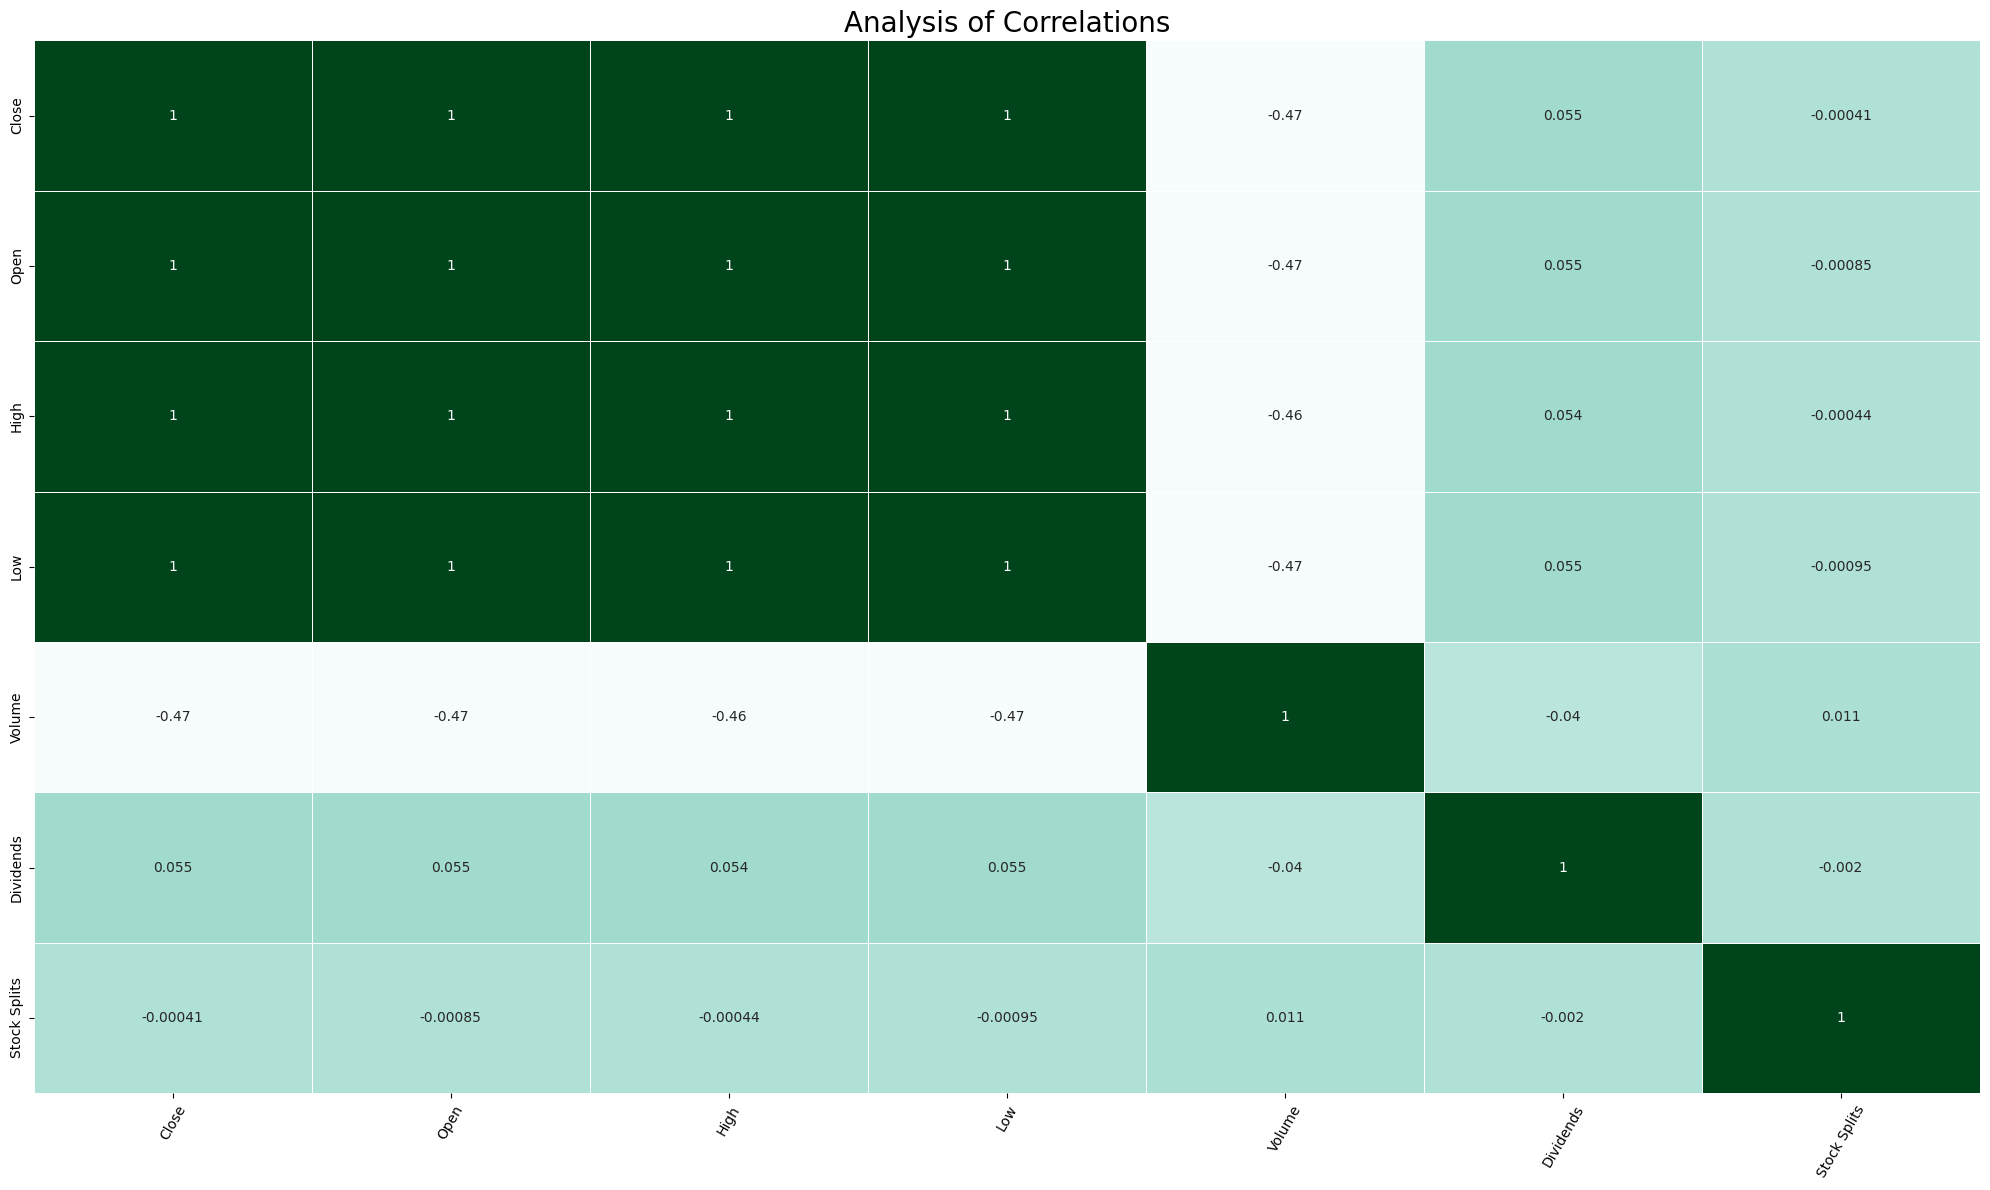

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="BuGn", annot=True, linewidths=.6, cbar=False)
plt.xticks(rotation = 60, size = 10)
plt.yticks(size=10)
plt.title("Analysis of Correlations", size=20)
plt.tight_layout()
plt.show()

- Tính tương quan giữa các biến giá cổ phiếu (Close, Open, High, Low):
    * Các mối quan hệ tương quan giữa 4 giá trị cổ phiếu này có giá trị bằng 1. Thể hiện một mối tương quan hoàn hảo và tích cực giữa chúng.
    * Các giá cổ phiếu có xu hướng hoạt động cùng chiều một cách chặt chẽ. Điều này được xác định một cách chính xác vì các mức giá này đều được mở bán trong cùng một thời gian giao dịch.
- Tính tương quan giữa các biến (Close, Open, High, Low) với các biến (Volume, Dividends, Stock Splits):
    * Với Volume: Các giá trị tương quan đều là -0.47~-0.46. Đây là tính tương quan tiêu cực và yếu. Điều này cho thấy có mối liên hệ yếu, khi giá tăng, khối lượng giao dịch có xu hướng giảm một chút, và ngược lại (Mối quan hệ này không mạnh).
    * Với Dividends: Các gia trị tương quan đều nằm ở mức 0.054. Đây là mức tương quan tích cực và rắt yếu. Mối quan hệ này không có mức ảnh hưởng nhiều đến giá cổ phiếu, cho thấy việc chi trả cổ tức không có mối liên hệ chặt chẽ với sự biến động của giá cổ phiếu.
    * Với Stock Splits: Các giá trị tương quan đều nằm trong mức 0.041~0.042. Đây là mối quan hệ tương quan tiêu cực và cực kỳ yếu. Việc chia tách cổ phiếu gần như không có mối quan hệ tương quan tuyến tính với sự biến động giá.
- Sự tương quan giữa các biến còn lại (Volume, Dividends, Stock Splits):
    * Các giá trị Volume, Dividends, Stock Splits không có mối tương quan liên hệ với nhau nên các giá trị tương quan tiêu cực và cực kỳ yếu.
    * Các ô trên đường chéo chính có giá trị tương quan mạnh mẽ vì một biến luôn tương quan mạnh mẽ với chính nó.

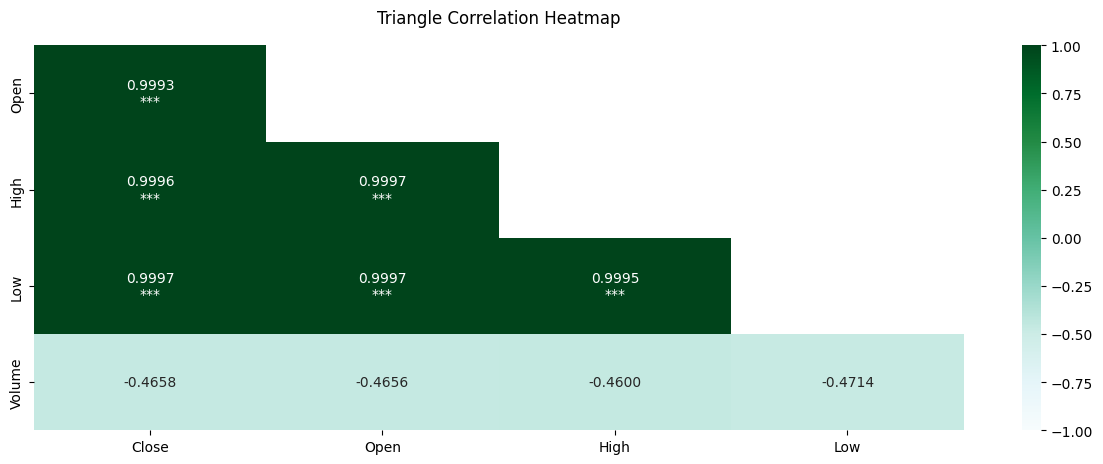

In [13]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (15,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin = -1, vmax=1, annot=annot, fmt='', cmap="BuGn")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 12}, pad = 16)
plt.show()

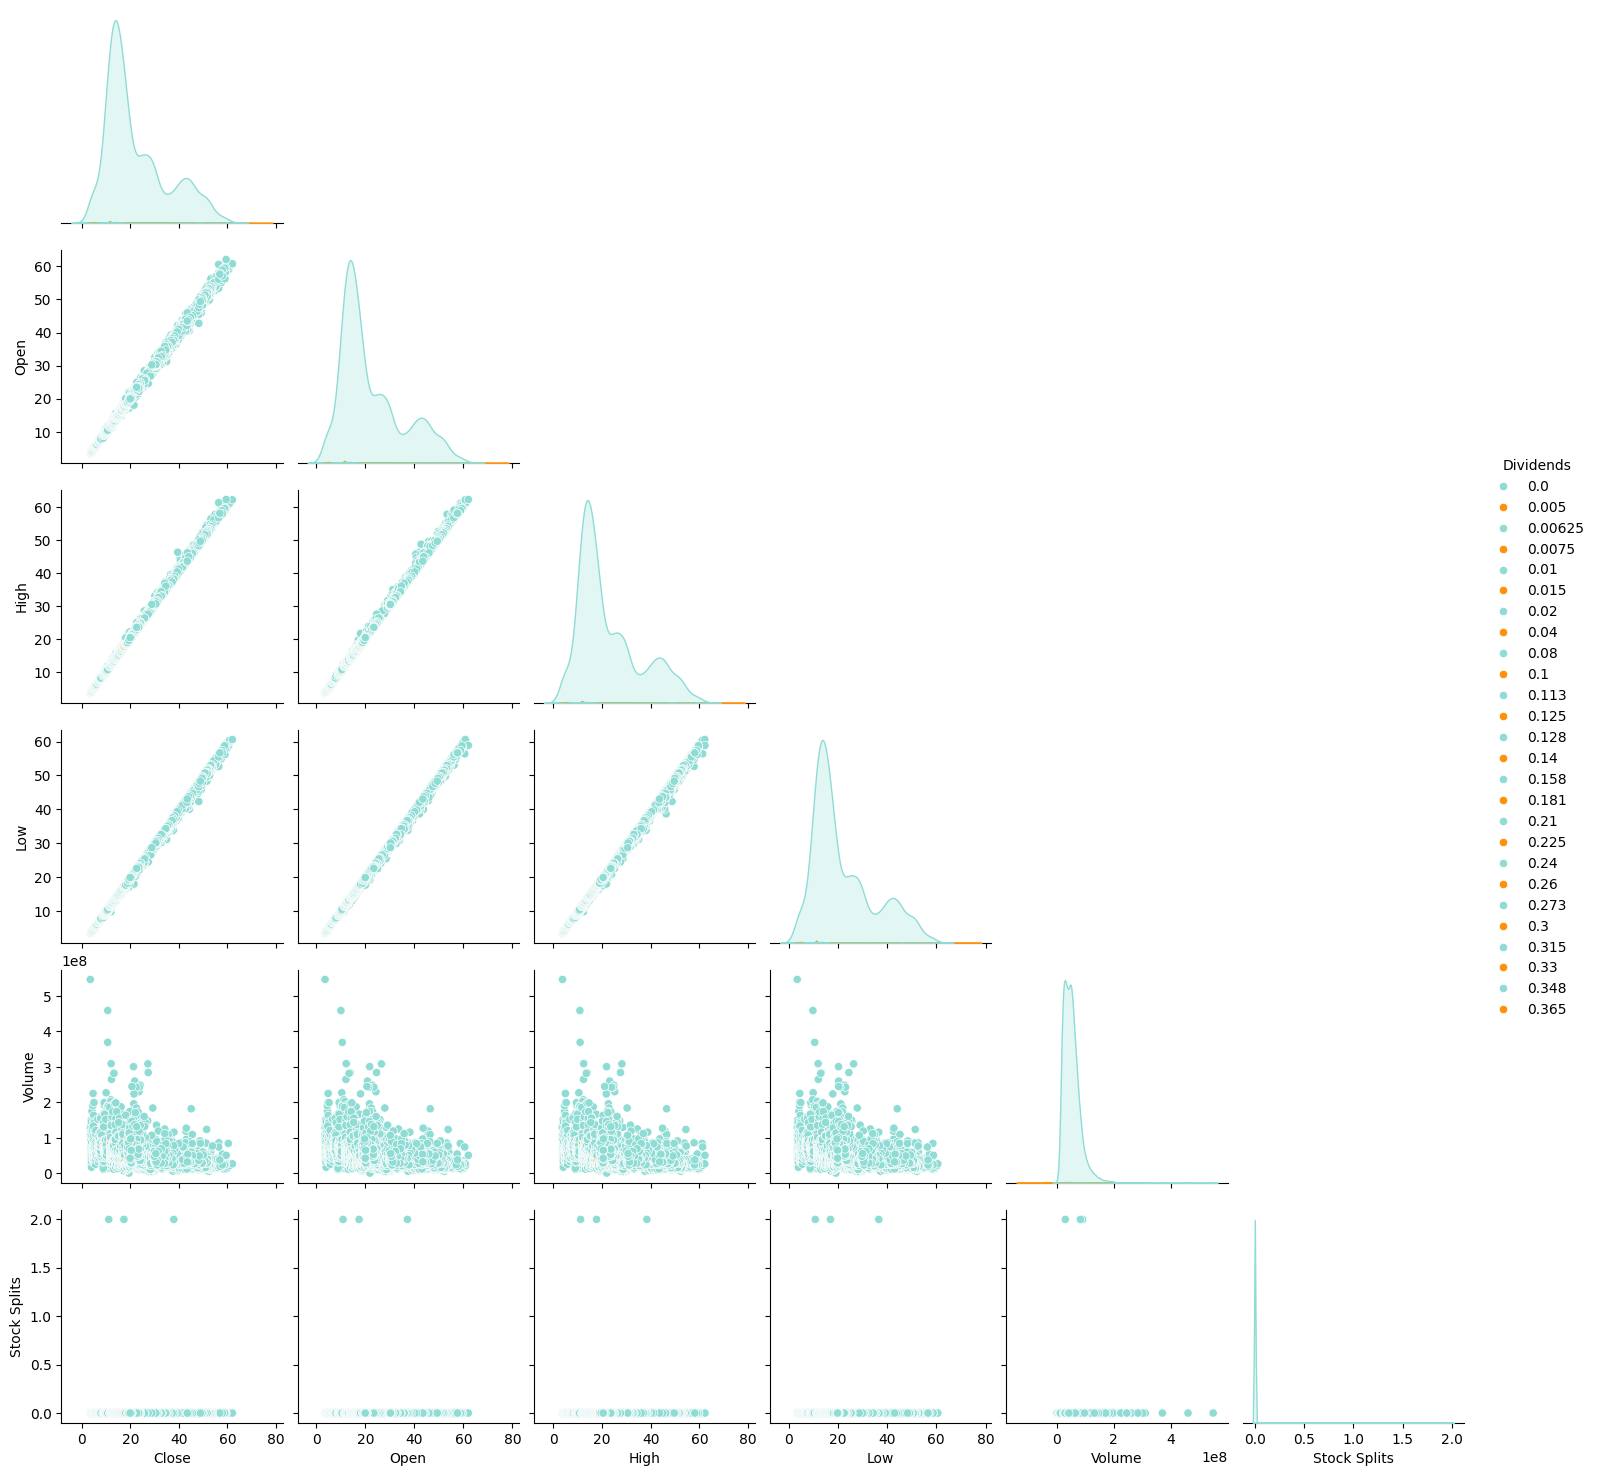

In [14]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(["#8FDCD5", "#FF910A"])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette, corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

## Distributions of prices

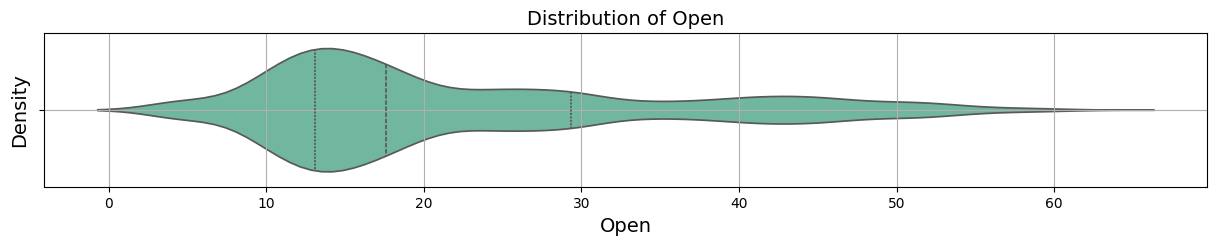

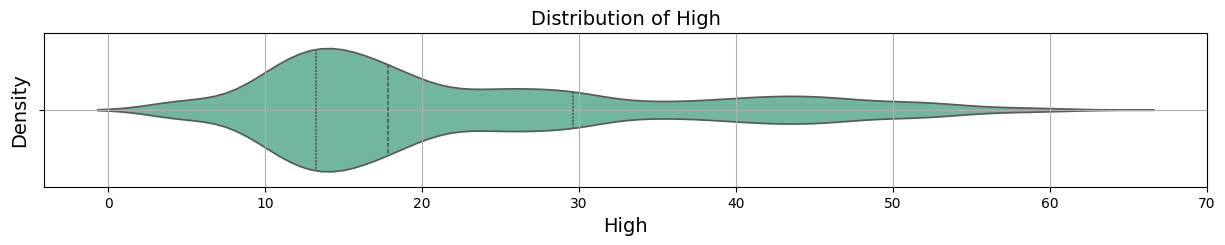

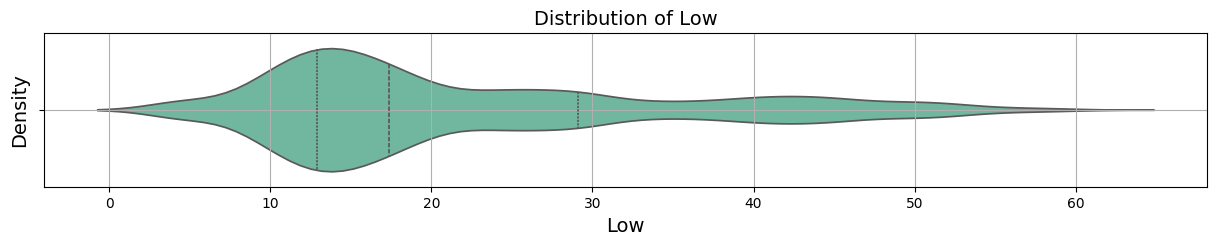

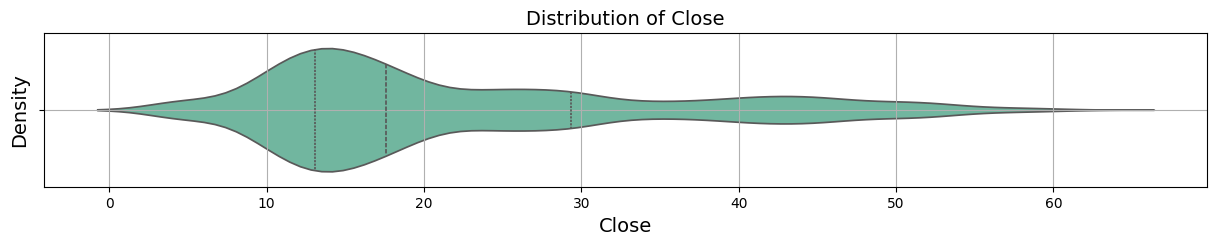

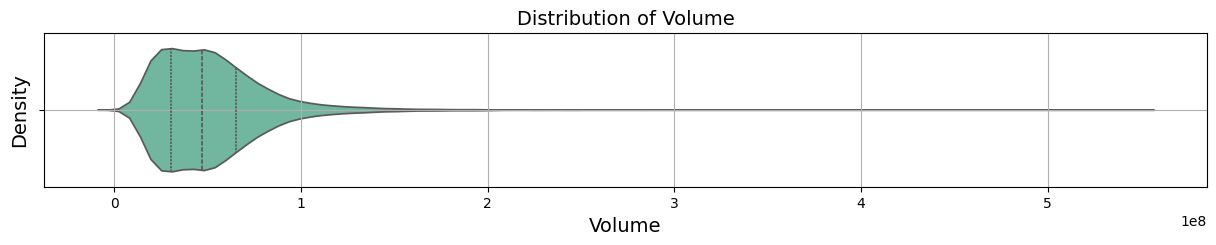

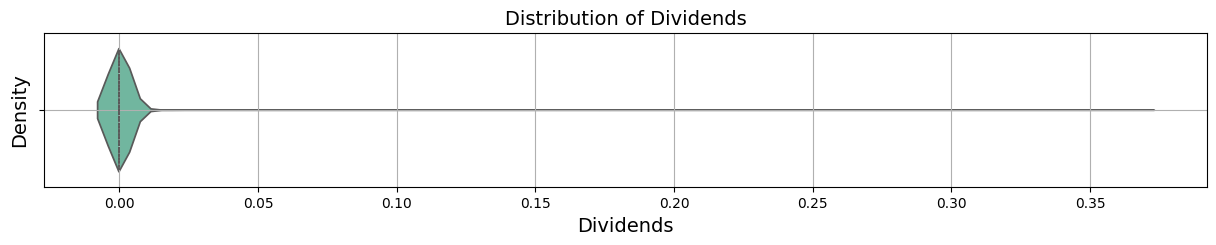

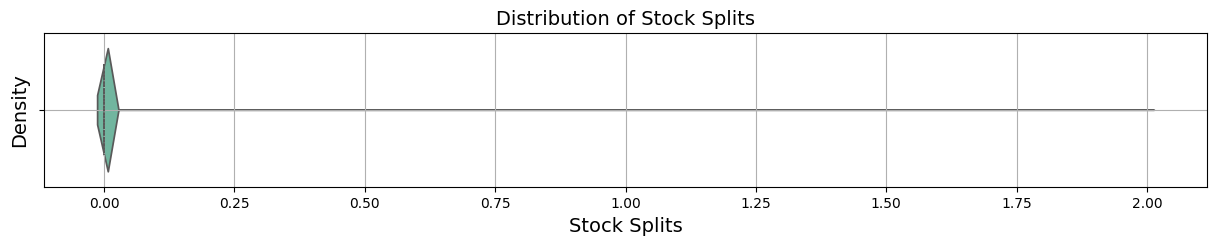

In [15]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.violinplot(x=df[column], palette=palette, inner="quartitle")
    plt.title(f"Distribution of {column}", fontsize = 14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(True)
    plt.show()

## Boxplot Distribution of Prices

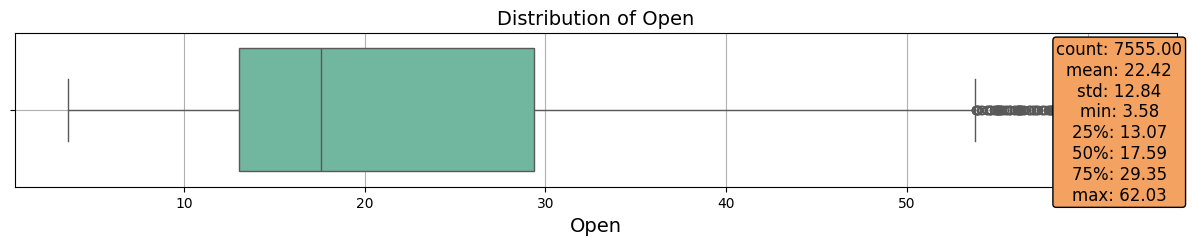

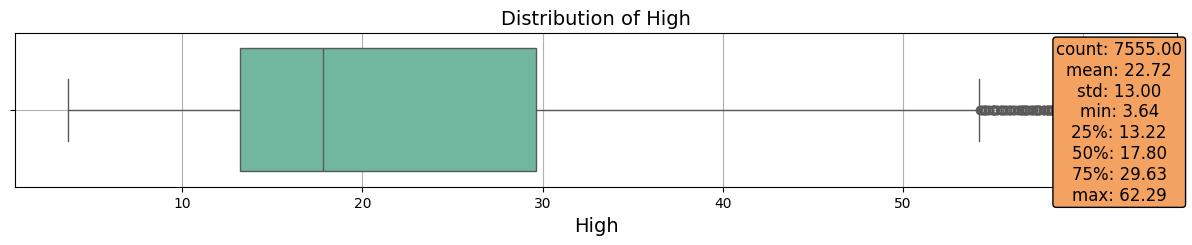

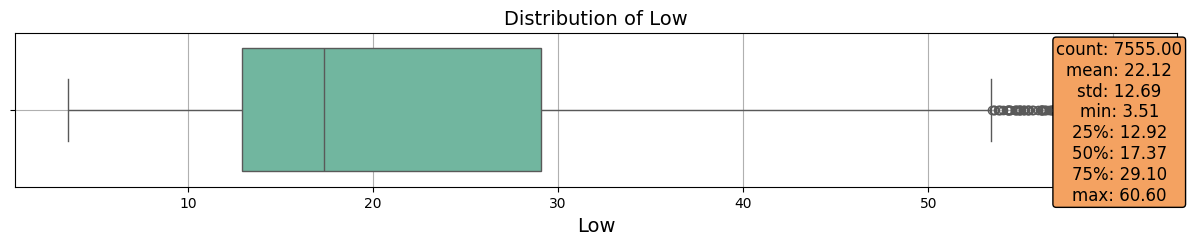

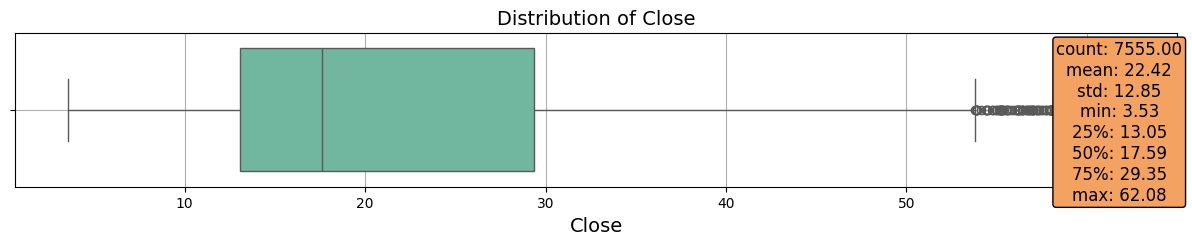

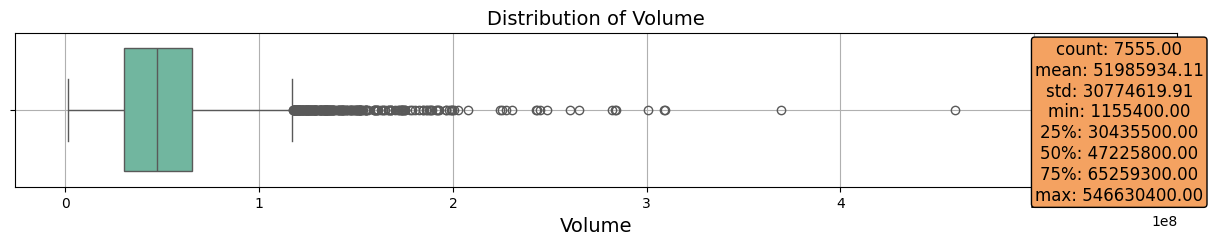

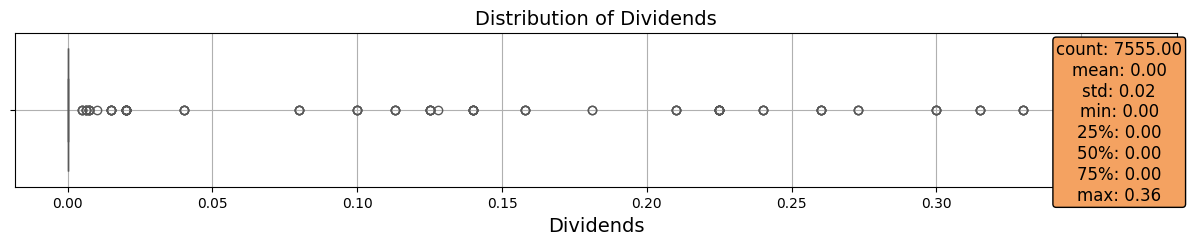

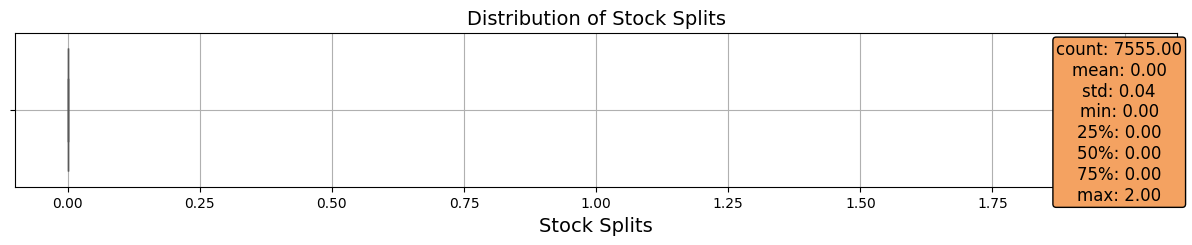

In [16]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f'{key}: {value:.2f}' for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True)
    plt.show()

## Attributes Stock Prices of Intel from 1995 to 2025

<function matplotlib.pyplot.show(close=None, block=None)>

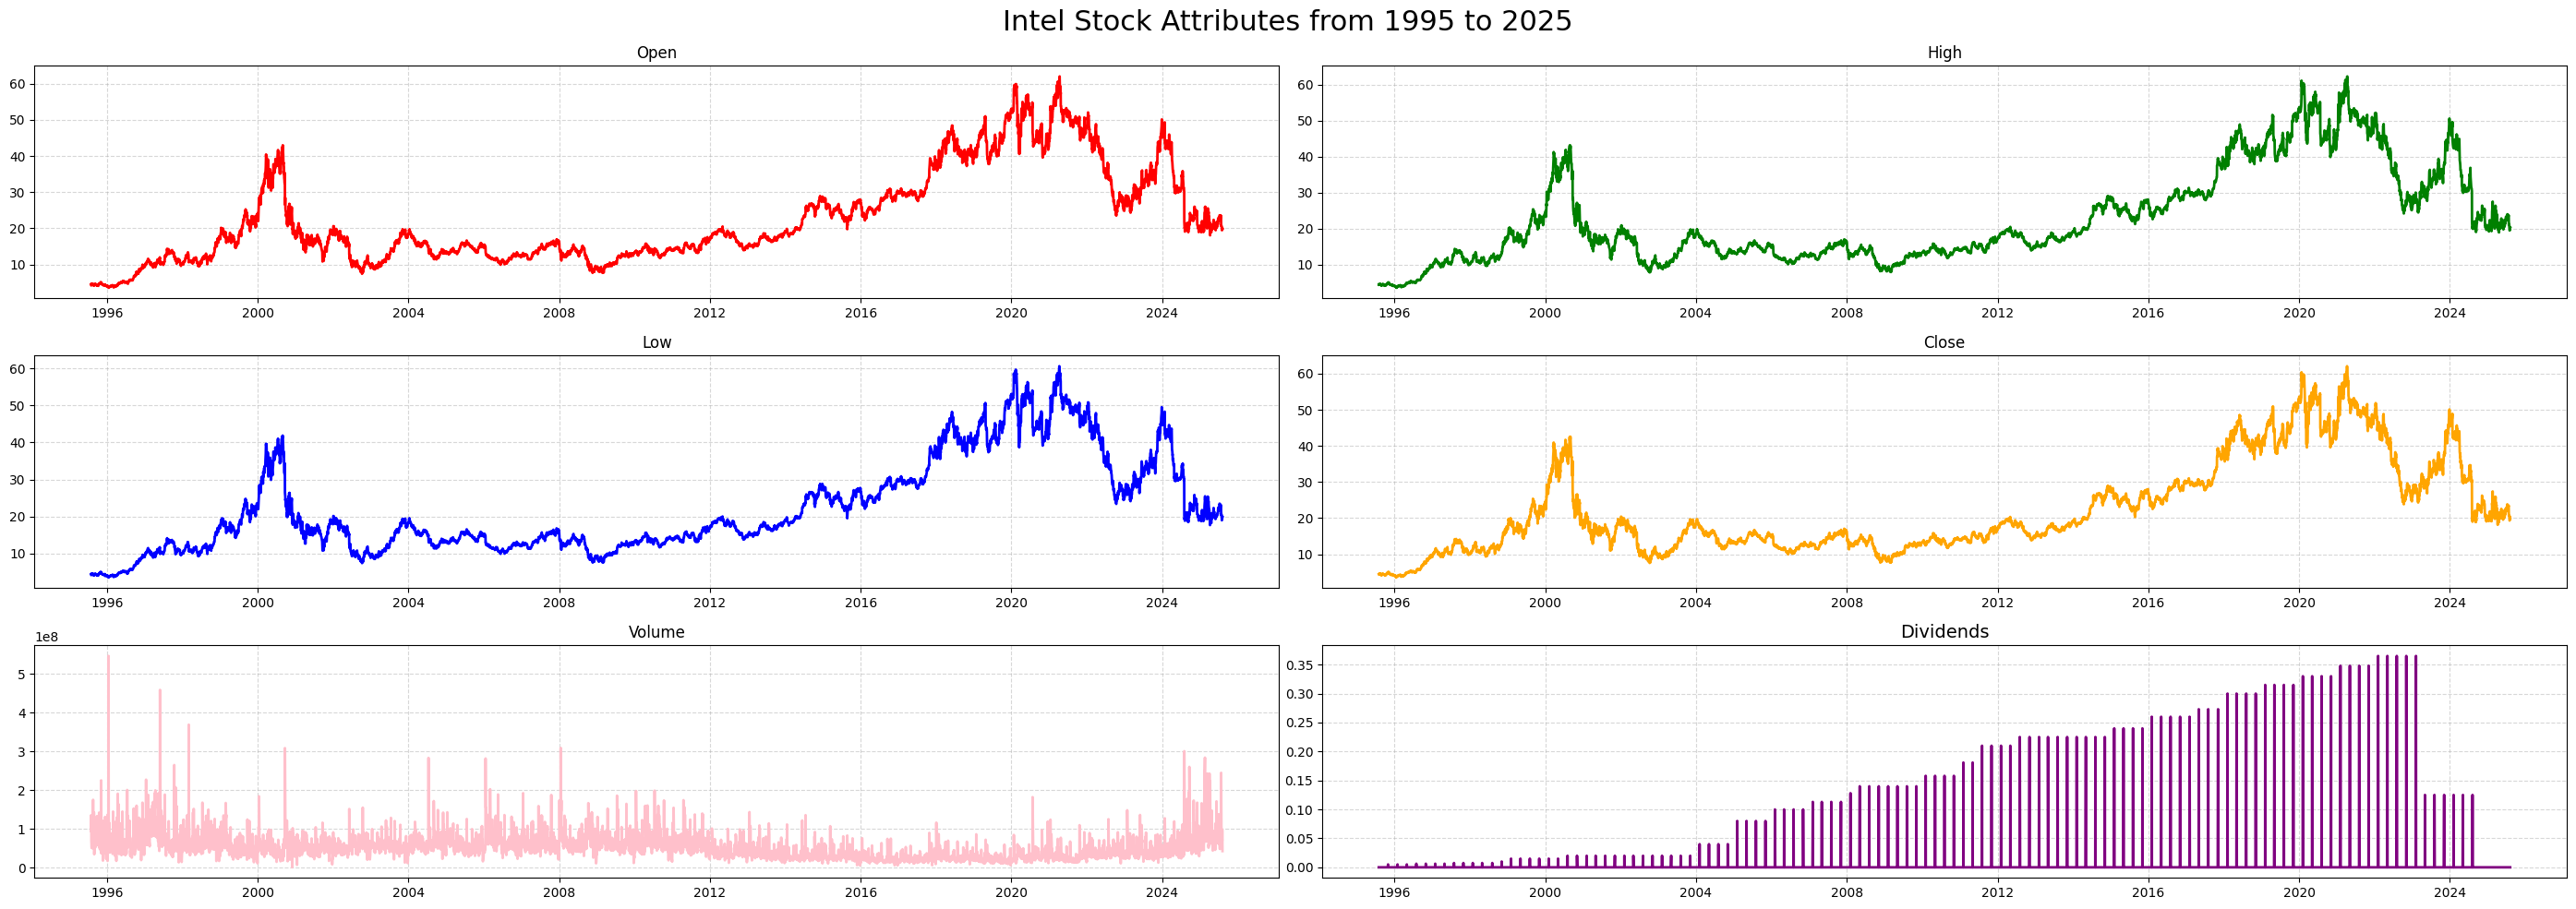

In [17]:
import matplotlib.pyplot as plt
x = df.index
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df["Open"], color = colors[0], linewidth=2)
plt.title('Open')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df["High"], color = colors[1], linewidth=2)
plt.title('High')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df["Low"], color = colors[2], linewidth=2)
plt.title('Low')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df["Close"], color = colors[3], linewidth=2)
plt.title('Close')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df["Volume"], color = colors[4], linewidth=2)
plt.title('Volume')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle("Intel Stock Attributes from 1995 to 2025", fontsize = 22, y=0.98)
plt.tight_layout()
plt.show


## Weekly Component

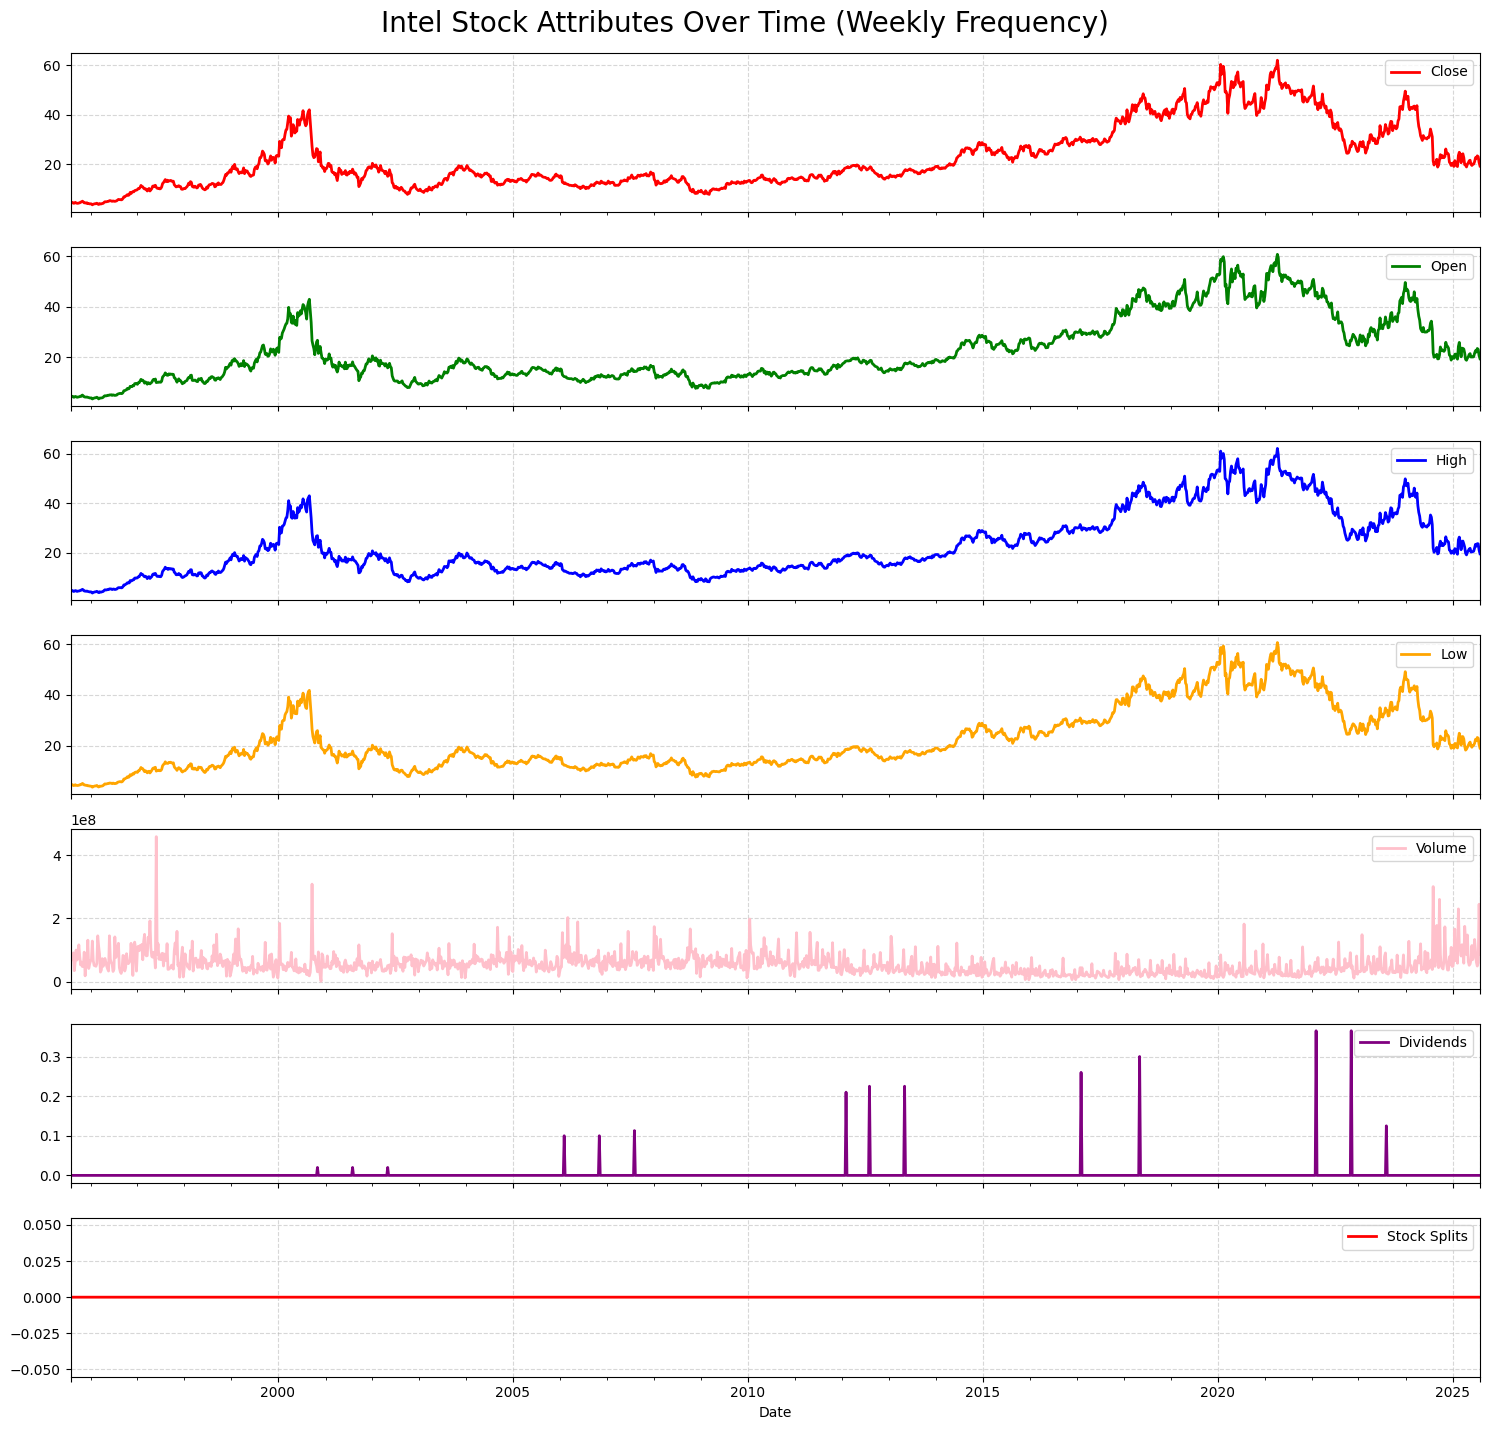

In [18]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']

df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Weekly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()   

## Monthly Component

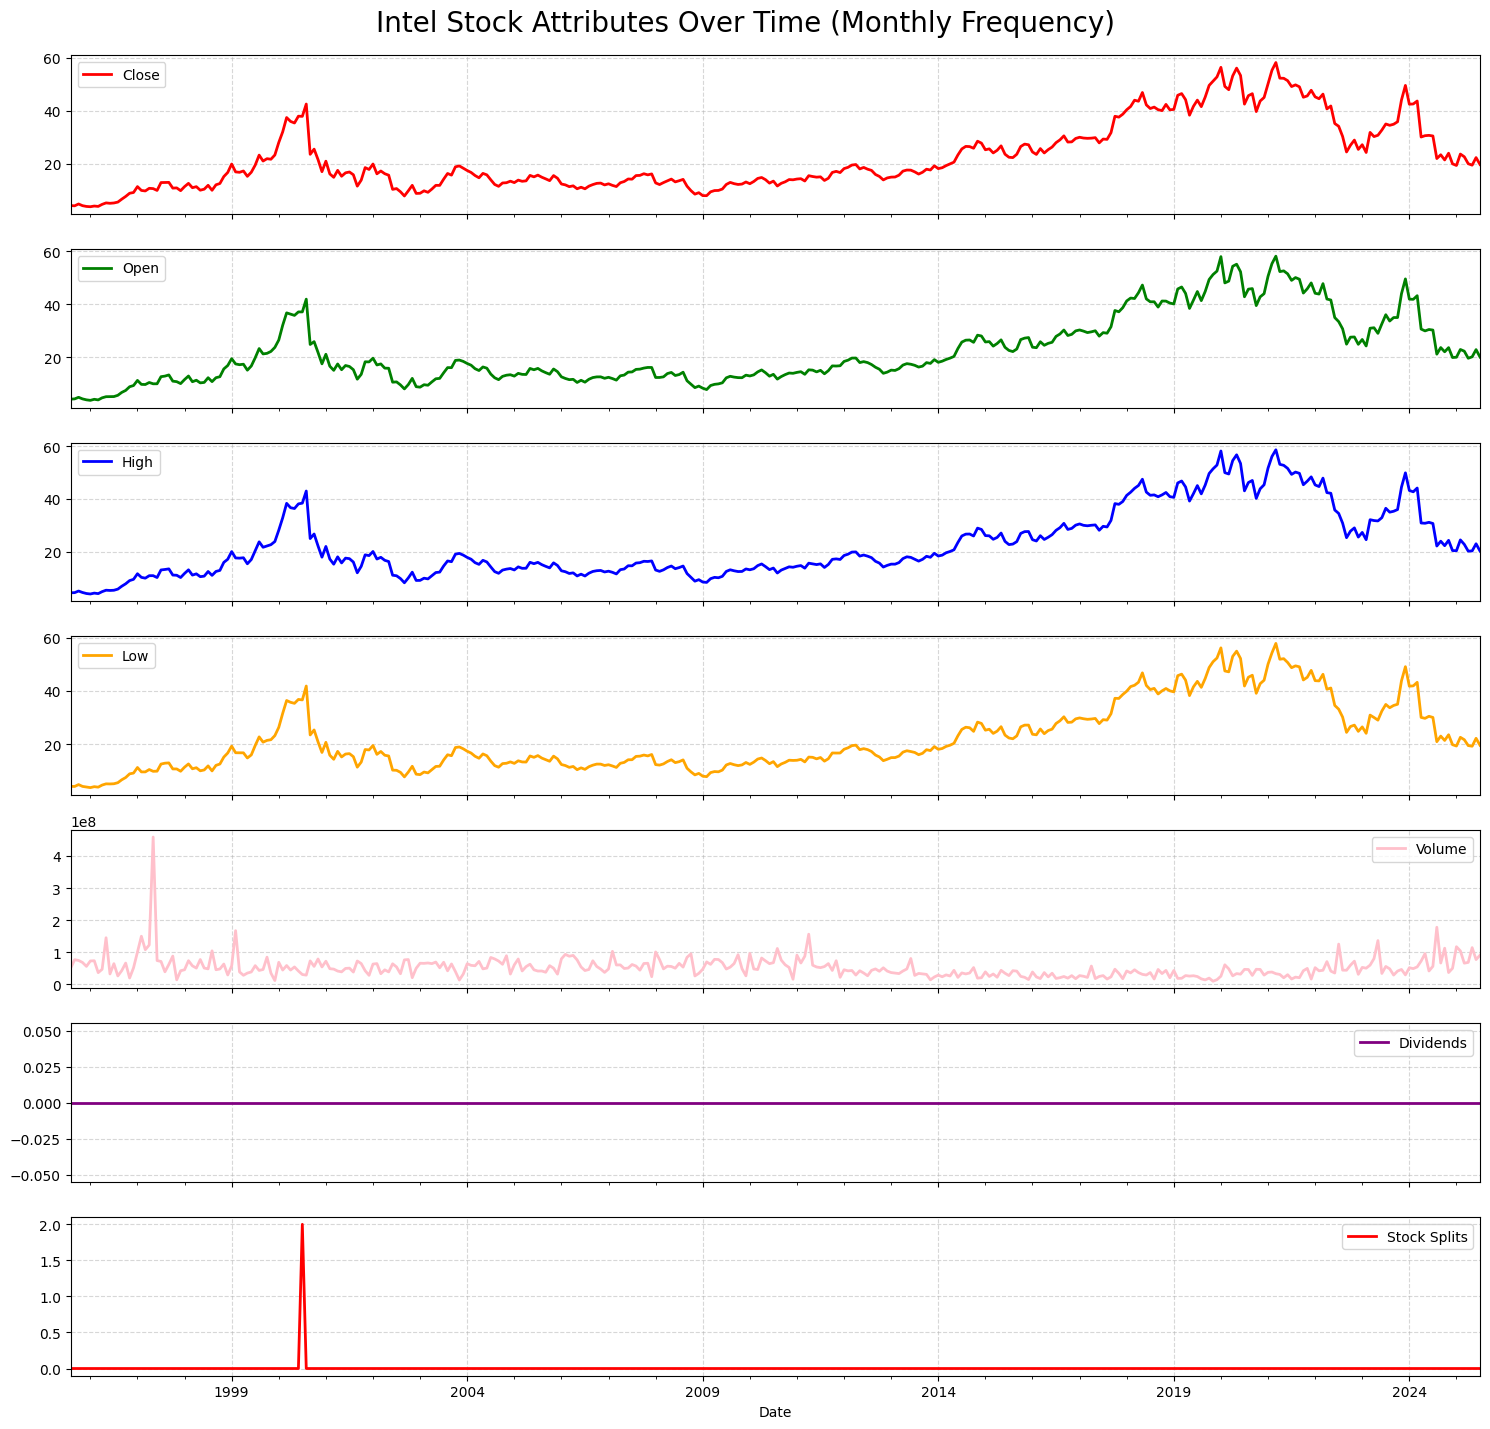

In [19]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
df_monthly = df.asfreq("M", method='ffill')
df_monthly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Monthly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle = '--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Candlestick Chart of Intel

In [20]:
import plotly.graph_objs as go
from datetime import datetime

candletrace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name = "INTC",
    increasing=dict(line=dict(color="#067c0c"), fillcolor='#ccf5e7'),
    decreasing=dict(line=dict(color="#ff2600"), fillcolor='#fde2dd'),
    hovertext=df.index.strftime('%Y-%m-%d'),
    hoverinfo='x+y+name'
)

layout = go.Layout(
    title=dict(
        text='Candlestick Chart of INTC',
        x=0.5,
        font = dict(size=24, color="#000000", family="Arial Black")
    ),
    xaxis=dict(
        title="Date",
        color='#264653',
        showgrid=True,
        gridcolor = 'lightgray',
        rangeslider=dict(visible=False)
    ),
    yaxis=dict(
        title="Price",
        color='#264653',
        showgrid=True,
        gridcolor='lightgray',
        showline=True,
        rangemode='normal',
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(240, 248, 255, 0.95)',
)

fig = go.Figure(data=[candletrace], layout=layout)

fig.show()

## Yearly Mean Prices

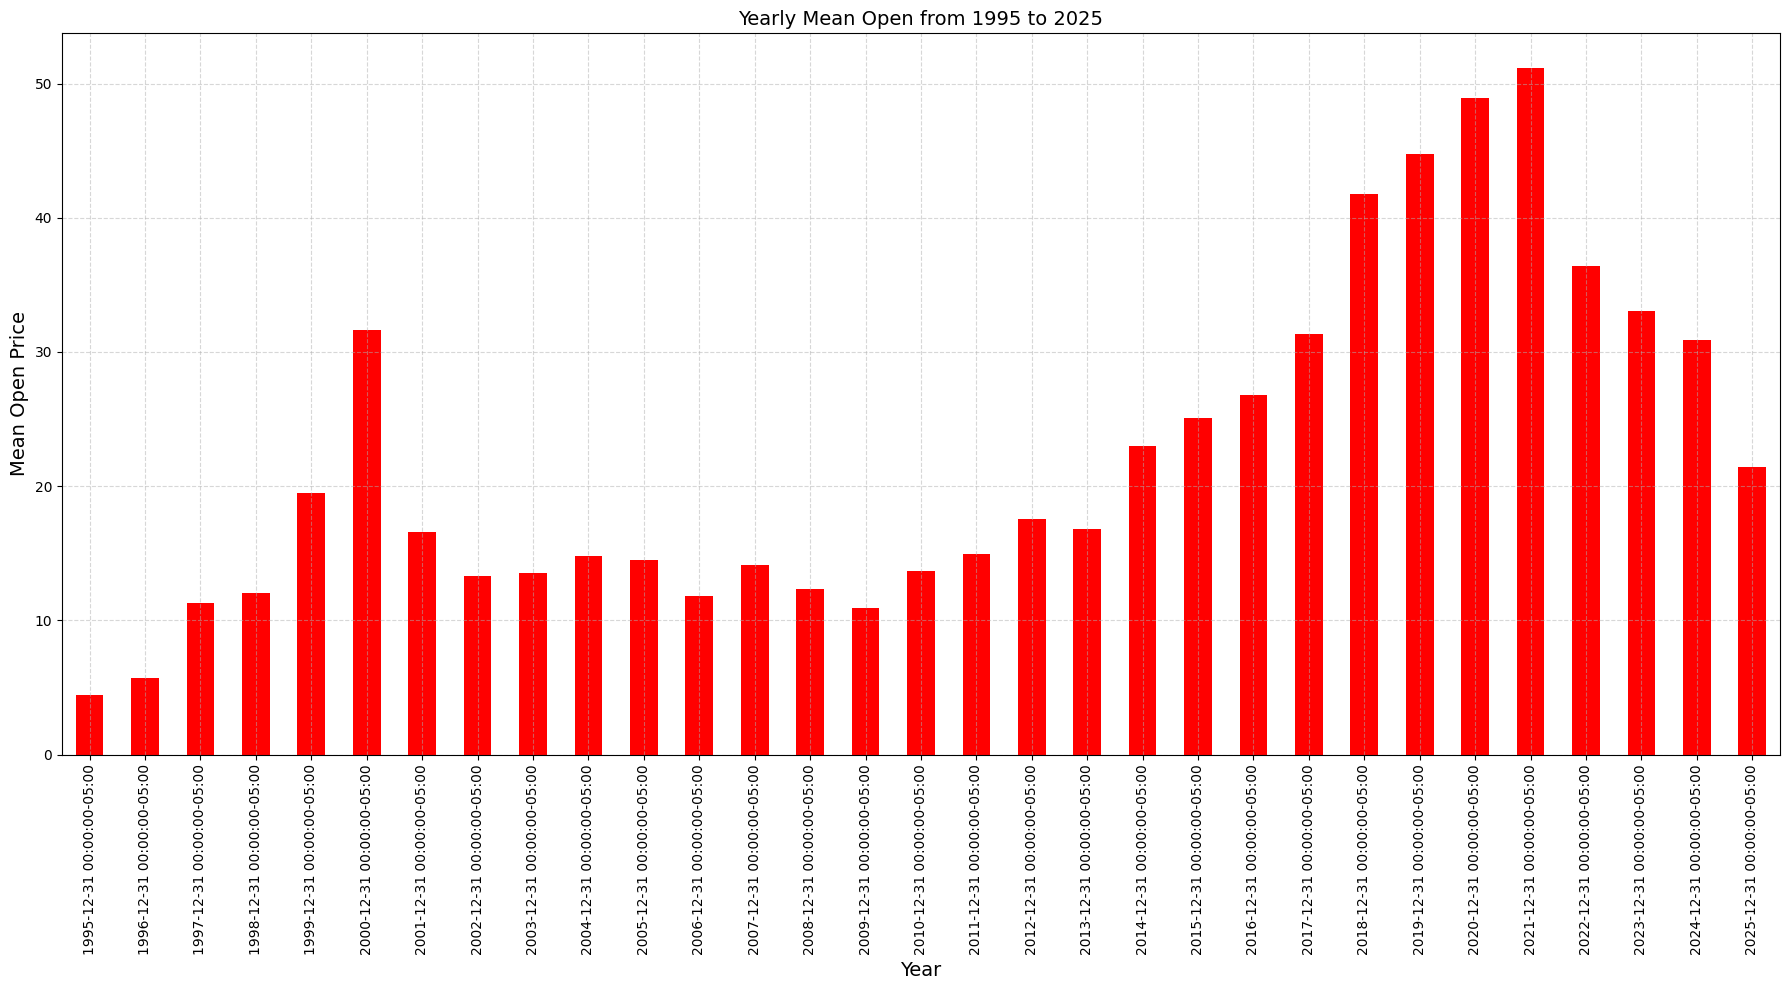

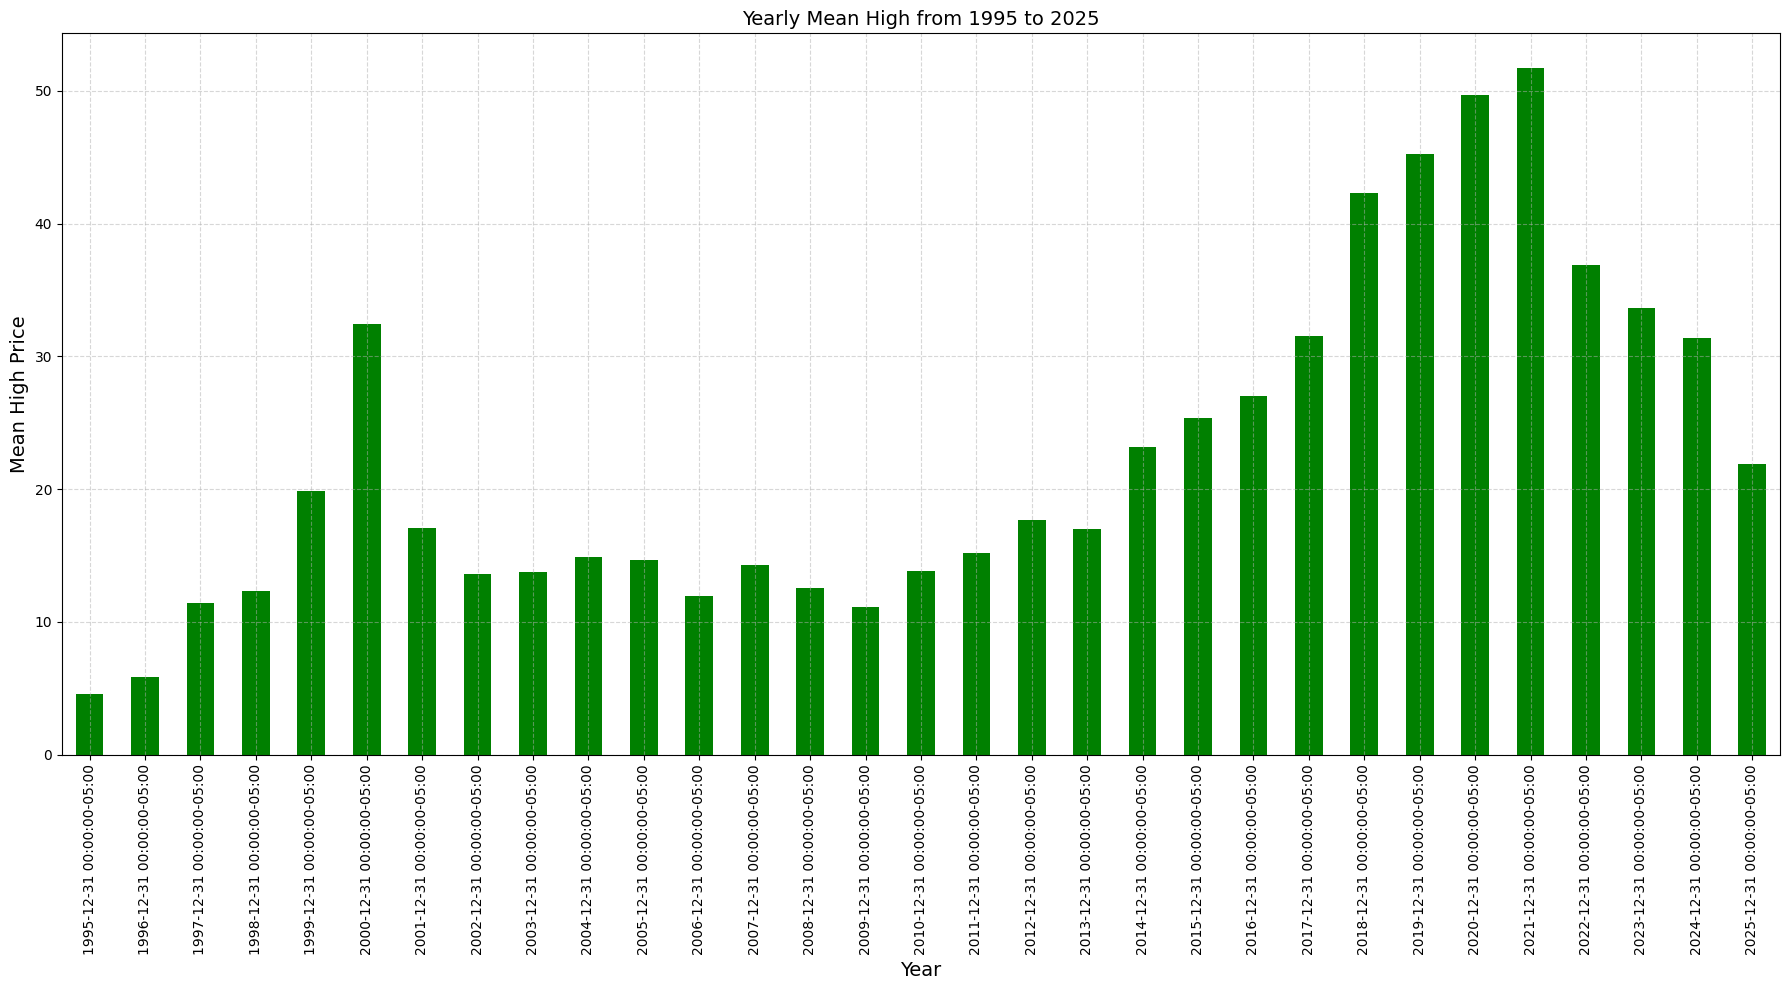

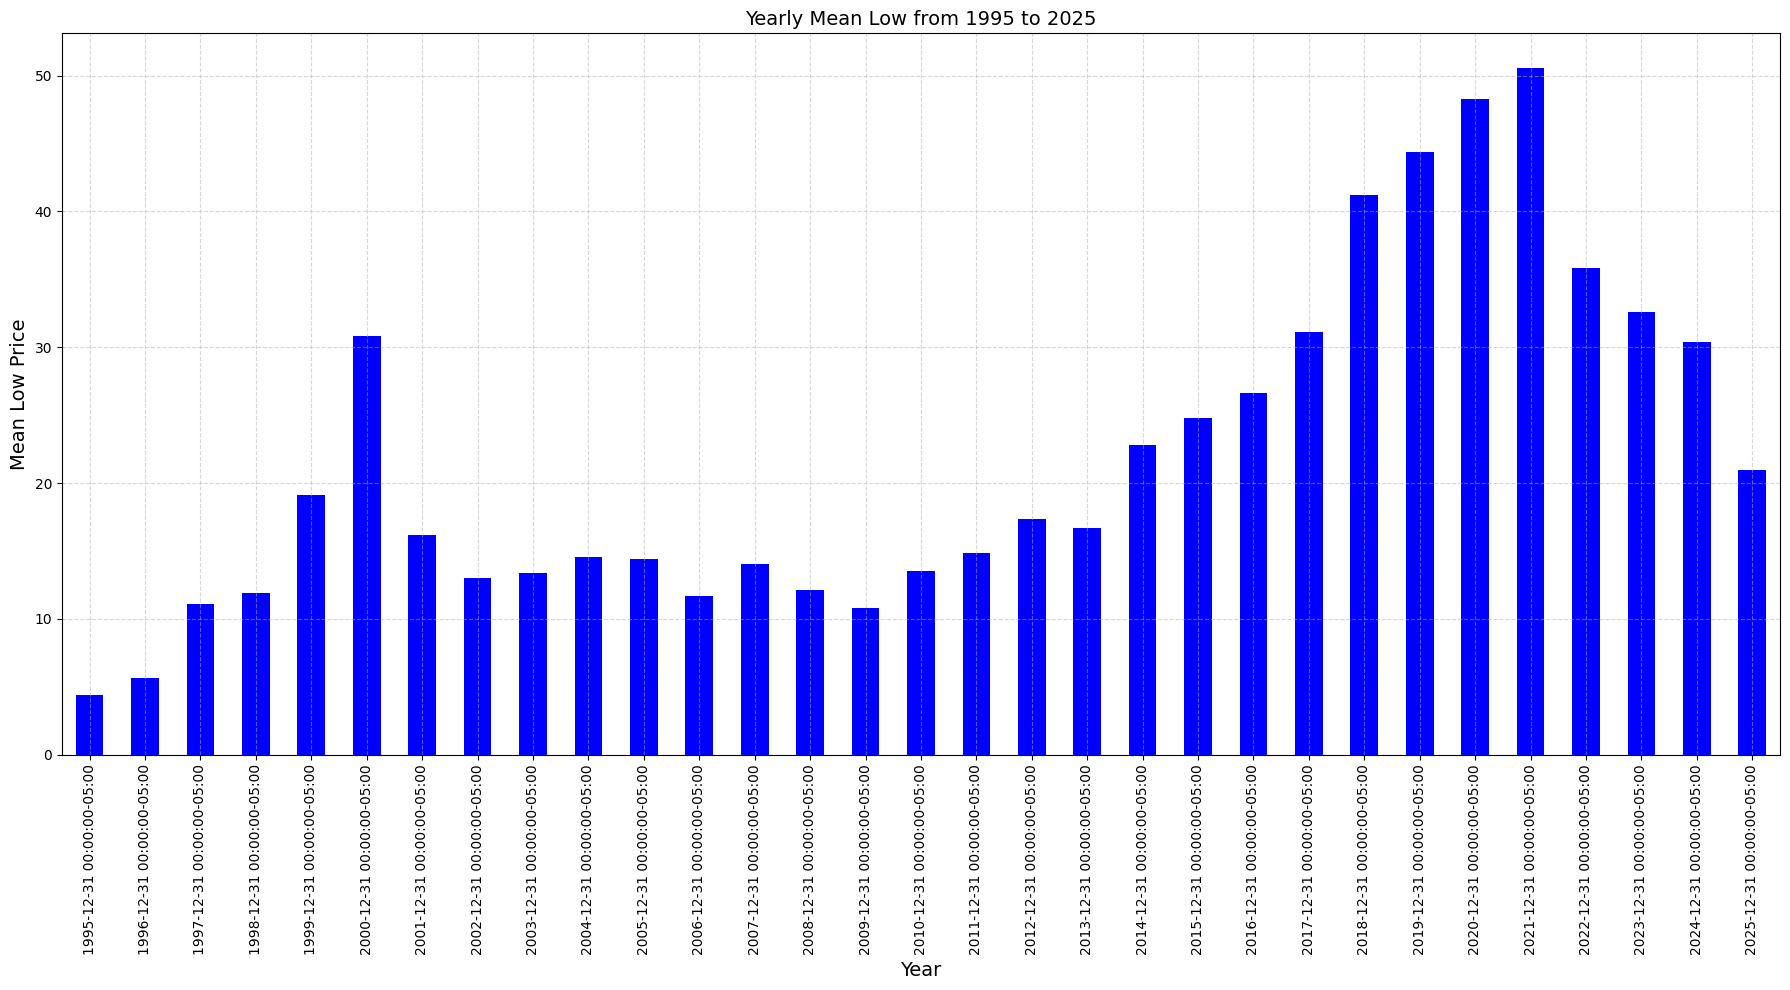

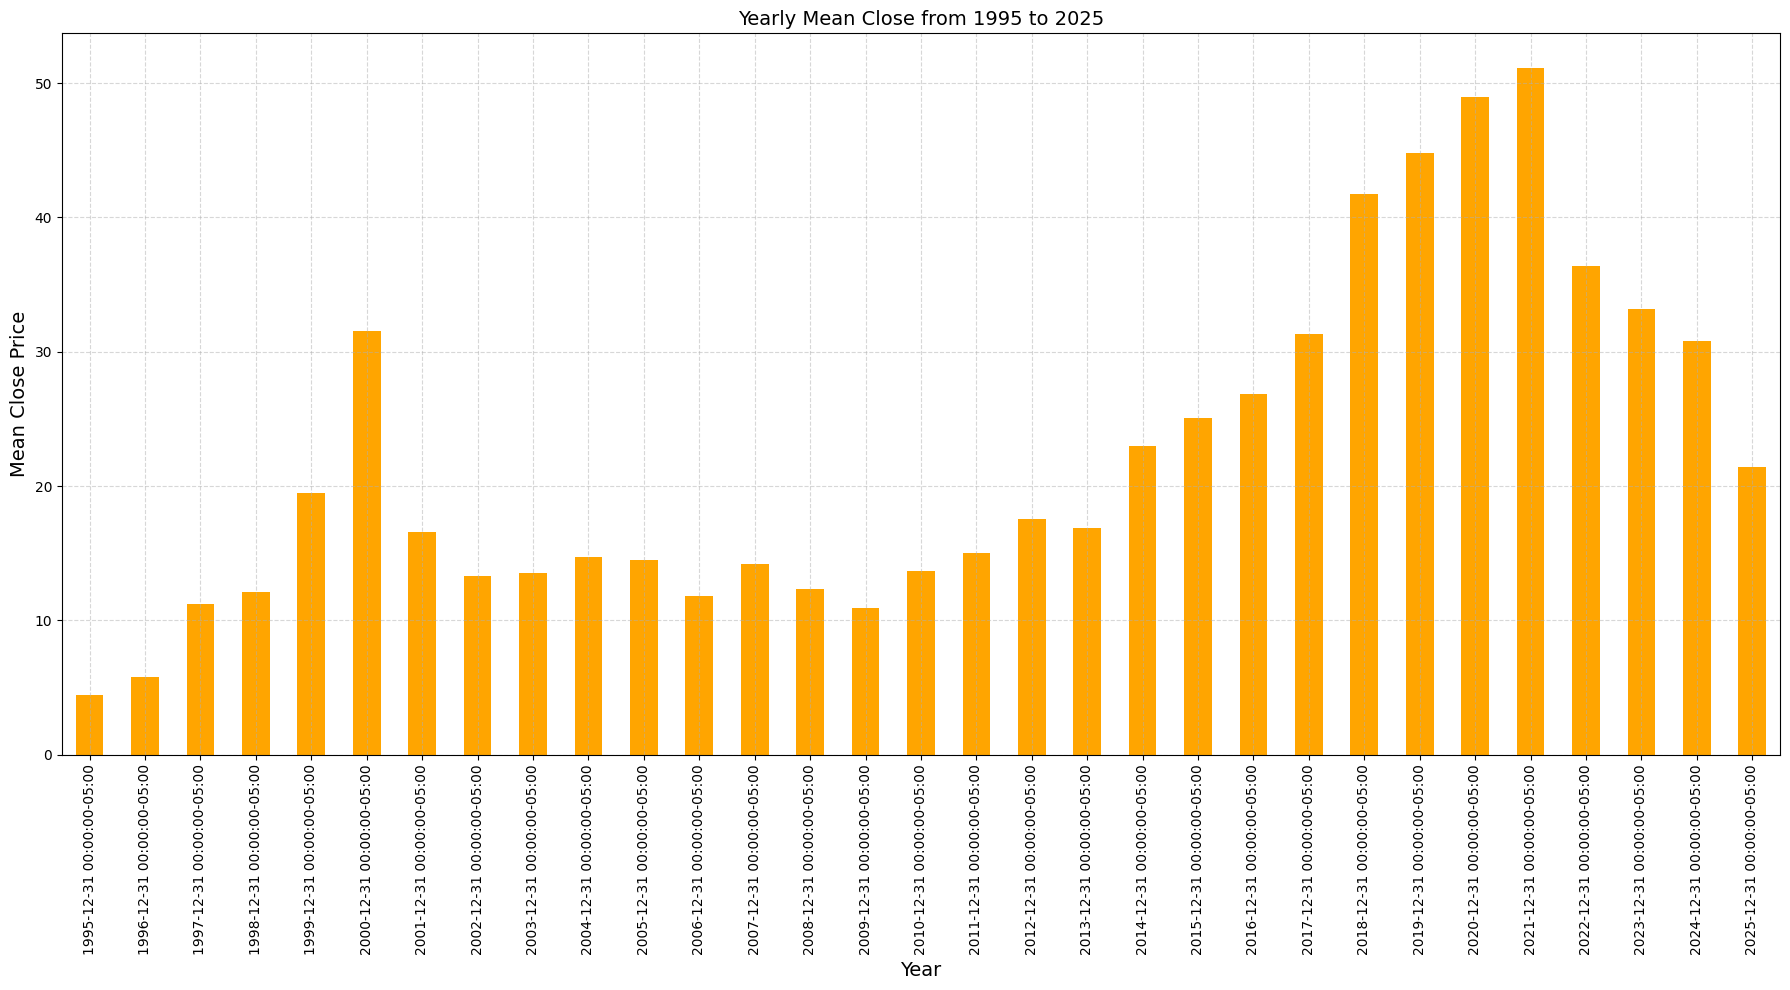

In [21]:
import math
import yfinance as yf
import datetime as dt
colors = ['red', 'green', 'blue', 'orange']
columns = ['Open', 'High', 'Low', 'Close']

for i, col in enumerate(columns):
    plt.figure(figsize=(18, 10))
    df[col].resample("A").mean().plot(kind='bar', color=colors[i])

    plt.title(f'Yearly Mean {col} from {df.index.year.min()} to {df.index.year.max()}', fontsize=14)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f'Mean {col} Price', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()




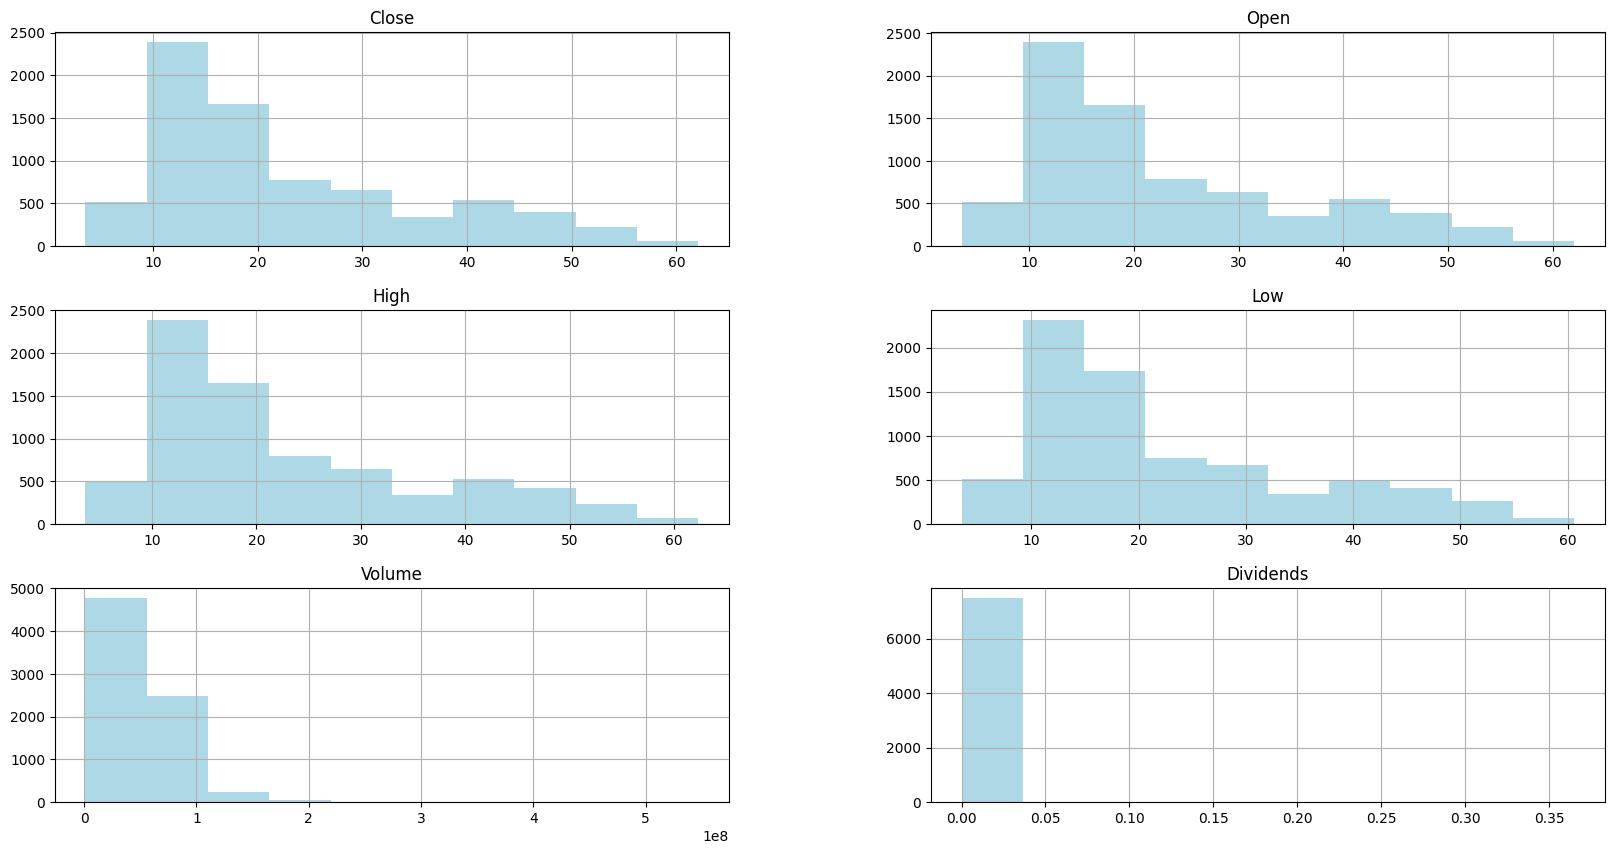

In [22]:
df1 = df.copy()
df1.drop("Stock Splits", axis=1, inplace=True)
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
hist = df1.hist(ax=ax, color = "lightblue")

## SMA (Simple Moving Average)

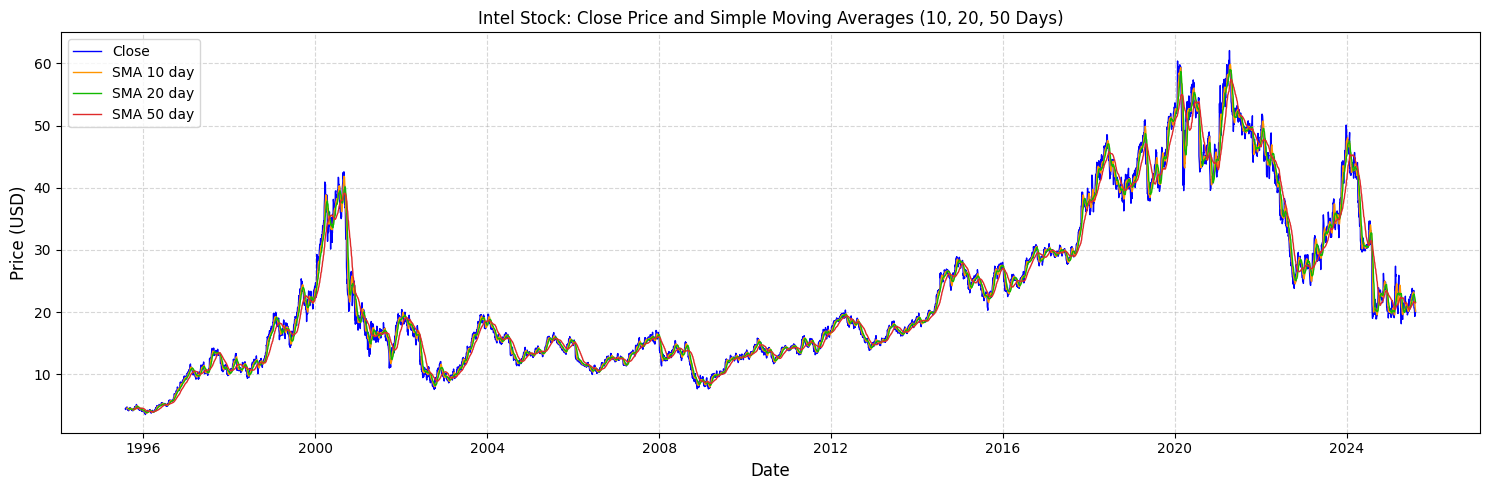

In [23]:
md = [10, 20, 50]
colors = ["#ff9500", "#12b900", "#DF2A2A"]

for i, SMA in enumerate(md):
    col = f'SMA {SMA} day'
    df[col] = df['Close'].rolling(SMA).mean()

plot_cols = ['Close'] + [f'SMA {SMA} day' for SMA in md]
plot_colors = ['blue'] + colors

plt.figure(figsize=(15, 5))
for i, col in enumerate(plot_cols):
    plt.plot(df.index, df[col], label=col, color=plot_colors[i], linewidth=1)

plt.title("Intel Stock: Close Price and Simple Moving Averages (10, 20, 50 Days)")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

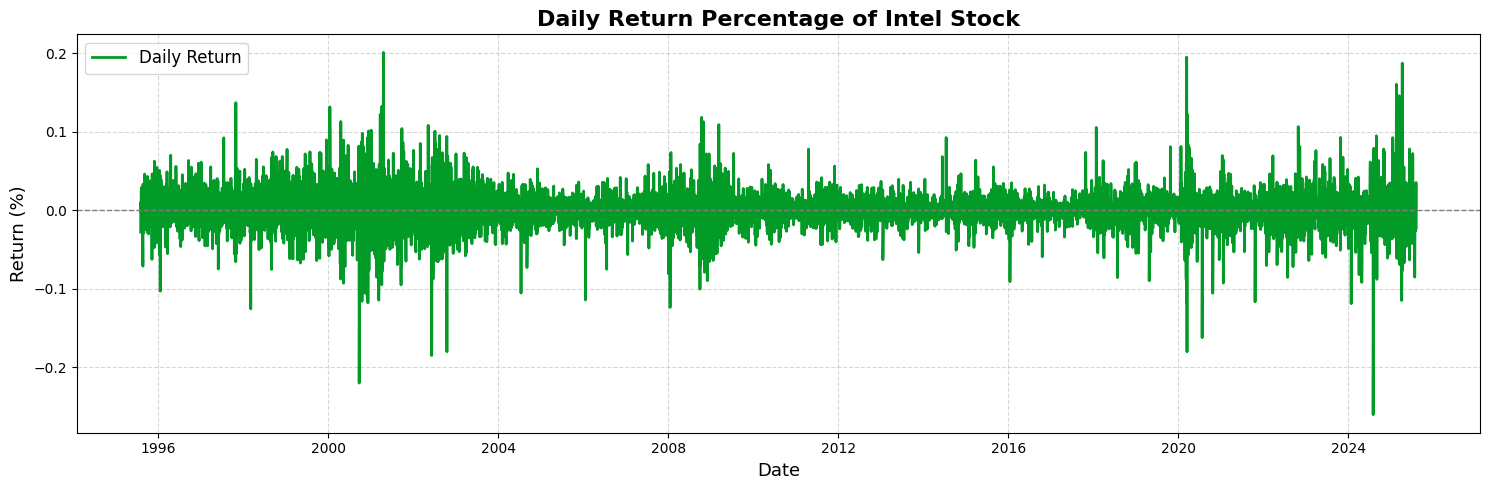

In [24]:
import matplotlib.pyplot as plt

# Tính phần trăm giá trị lợi nhuận mỗi ngày so với ngày trước đó
df['Daily_Return']=df['Close'].pct_change()

plt.figure(figsize=(15, 5))
plt.plot(df.index, df["Daily_Return"], color="#039b27", linewidth=2, label="Daily Return")

# df['Daily_Return_SMA10'] = df['Daily_Return'].rolling(window=10).mean()
# plt.plot(df.index, df["Daily_Return_SMA10"], color="#b3b61d", linewidth=2, linestyle='--', label='10 Day SMA')

# df['Daily_Return_SMA20'] = df['Daily_Return'].rolling(window=20).mean()
# plt.plot(df.index, df["Daily_Return_SMA20"], color='#e76f51', linewidth=2, linestyle='--', label='20 Day SMA')

plt.axhline(0, color="gray", linewidth=1, linestyle='--')

plt.title('Daily Return Percentage of Intel Stock', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Return (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits',
       'SMA 10 day', 'SMA 20 day', 'SMA 50 day', 'Daily_Return'],
      dtype='object')

In [26]:
from IPython.display import Image
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import os


2025-08-07 13:56:08.135108: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
df2 = df.copy(deep=True)

scaler = MinMaxScaler(feature_range=(-1, 1))

columns = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in columns:
    df2[col] = scaler.fit_transform(df2[col].values.reshape(-1, 1))


selected_columns = ['Open', 'High', 'Low', 'Volume', 'Close']
df_array = df2[selected_columns].values

print('Shape of scaled data: ',df_array.shape)

Shape of scaled data:  (7555, 5)


# Modeling (Tensorflow)

## RNN (Recurrent Neural Networks)

In [28]:
# Preparing Data for Time Series
seq_len = 11 #Lấy độ dài mỗi chuỗi
sequences = [] #Luu các chuỗi vào danh sách

for i in range(len(df_array)-seq_len + 1):
    seq = df_array[i : i + seq_len]
    sequences.append(seq)

sequences = np.array(sequences)
print("Shape of Sequences: ", sequences.shape)

Shape of Sequences:  (7545, 11, 5)


### Splitting the dataset

In [29]:
def split_data(sequences):
    train_data, test_data = train_test_split(sequences, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, test_data, val_data

In [30]:
train_data, test_data, val_data = split_data(sequences)
print("Train Data:", train_data.shape, "Validation Data:", val_data.shape, "Test Data:", test_data.shape)

Train Data: (6036, 11, 5) Validation Data: (754, 11, 5) Test Data: (755, 11, 5)


In [31]:
X_train = train_data[:, :-1, :]
y_train = train_data[:, -1, -1]

X_test = test_data[:, :-1, :]
y_test = test_data[:, -1, -1]

X_valid = val_data[:, :-1, :]
y_valid = val_data[:, -1, -1]

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")

X_train: (6036, 10, 5), y_train: (6036,)
X_test: (755, 10, 5), y_test: (755,)
X_valid: (754, 10, 5), y_valid: (754,)


### Defining Model 
Using Long Short-term Memory (LSTM) to capture sequential infomation. Using Functional API in class

In [32]:
class LSTMRegressor(Model):
    def __init__(self, input_shape, units1=64, units2=32, Dense_units = 64):
        inputs = Input(shape=input_shape, name='Input')

        x = Bidirectional(LSTM(units1, return_sequences=True, kernel_regularizer=l2(1e-5)), name="BiLSTM_1")(inputs)
        x = Dropout(0.1, name='Dropout_1')(x)
        x = LSTM(units2, return_sequences=False, kernel_regularizer=l2(0.0001), name="LSTM_2")(x)
        x = BatchNormalization(name="BatchNorm")(x)
        x = Dropout(0.2, name='Dropout_2')(x)
        x = Dense(Dense_units, activation='relu', kernel_regularizer=l2(0.0001), name="Dense_1")(x)
        x = Dense(8, activation='relu', name="Dense_2")(x)
        outputs = Dense(1, name="output")(x)

        self.model = Model(inputs=inputs, outputs=outputs, name="LSTMRegressor")

    def compile(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def predict(self, *args, **kwargs):
        return self.model.predict(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        return self.model.evaluate(*args, **kwargs)
    
    def summary(self):
        return self.model.summary()
    
    def plot_model_architecture(self, filename="model_architecture.png"):
        plot_model(self.model, to_file=filename, show_shapes=True)


input_shape = (X_train.shape[1], X_train.shape[2])
model = LSTMRegressor(input_shape)

optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stoping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)


history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 64,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stoping]
)


2025-08-07 13:56:10.352711: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-07 13:56:10.398373: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-07 13:56:10.398433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-07 13:56:10.400287: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-07 13:56:10.400393: I external/local_xla/xla/stream_executor

Epoch 1/50


2025-08-07 13:56:13.583019: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1945 - val_loss: 0.3747
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0686 - val_loss: 0.3193
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0529 - val_loss: 0.2875
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0428 - val_loss: 0.2726
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0384 - val_loss: 0.2017
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0347 - val_loss: 0.1359
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0315 - val_loss: 0.0649
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0325 - val_loss: 0.0211
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0292 - val_loss: 0.0202
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0273 - val_loss: 0.0193
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0269 - val_loss: 0.0188
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0252 - val_l

In [33]:
y_pred = model.predict(X_test)

test_loss = model.evaluate(X_test, y_test)
print("Test Loss:",test_loss)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131
Test Loss: 0.012854782864451408


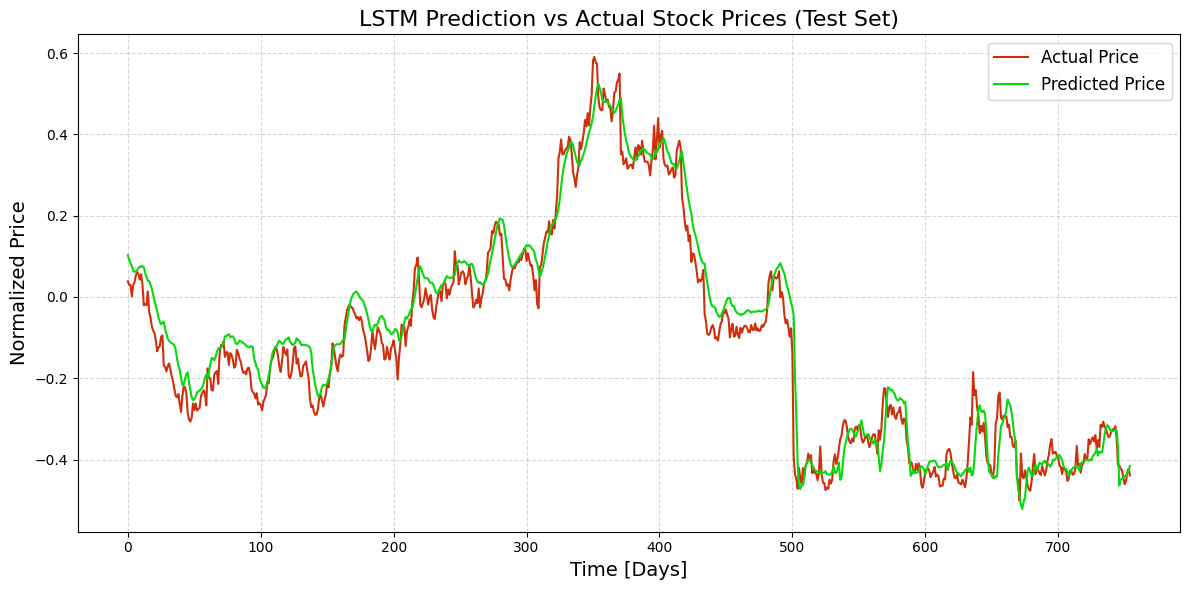

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color="#ce300d", label = "Actual Price")

plt.plot(y_pred, color = "#05d90c", label = "Predicted Price")

plt.title("LSTM Prediction vs Actual Stock Prices (Test Set)", fontsize=16)
plt.xlabel('Time [Days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

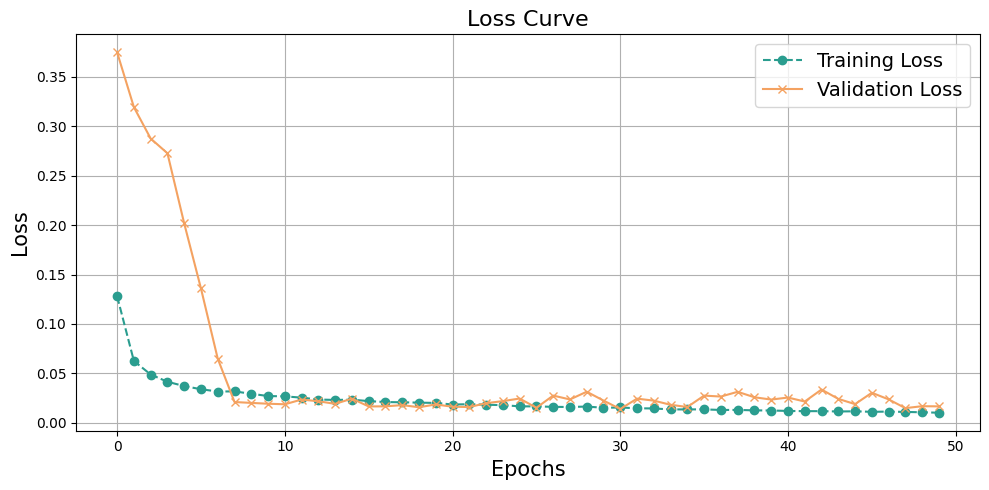

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')

plt.title("Loss Curve", fontsize=16)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
print("Model Summary")
model.summary()

Model Summary


Model: "LSTMRegressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 10, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BiLSTM_1 (Bidirectional)        │ (None, 10, 128)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm (BatchNormalization)  │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,525 (693.46 KB)

 Trainable params: 59,153 (231.07 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 118,308 (462.14 KB)

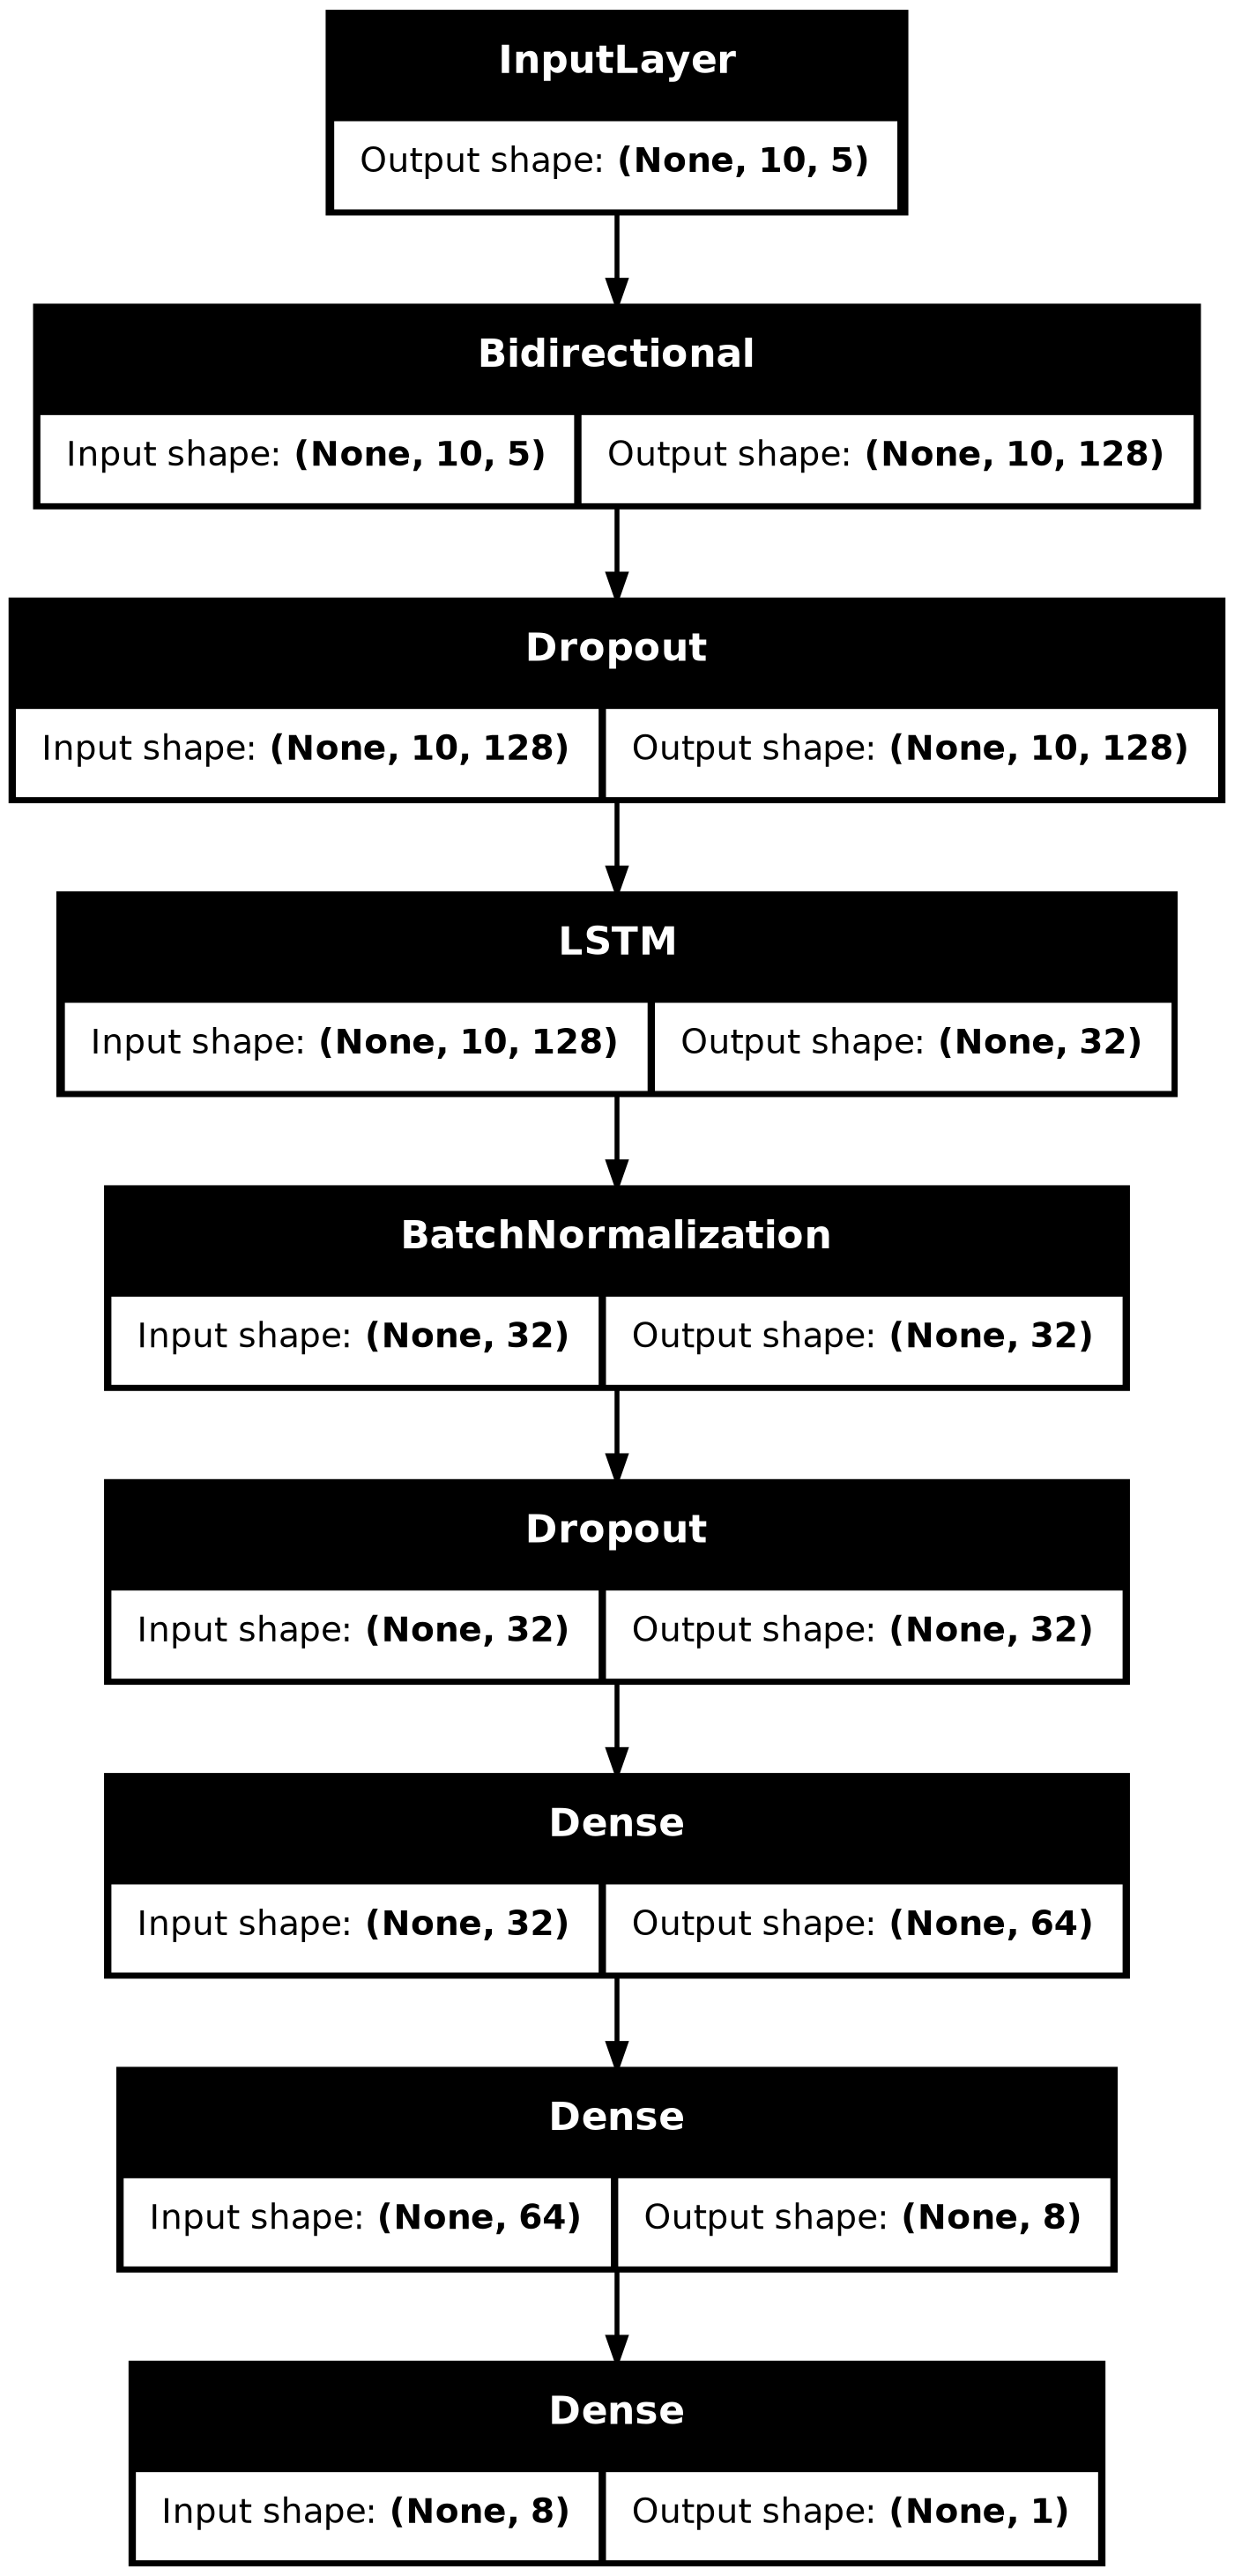

In [37]:
model.plot_model_architecture()
Image(filename="model_architecture.png")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


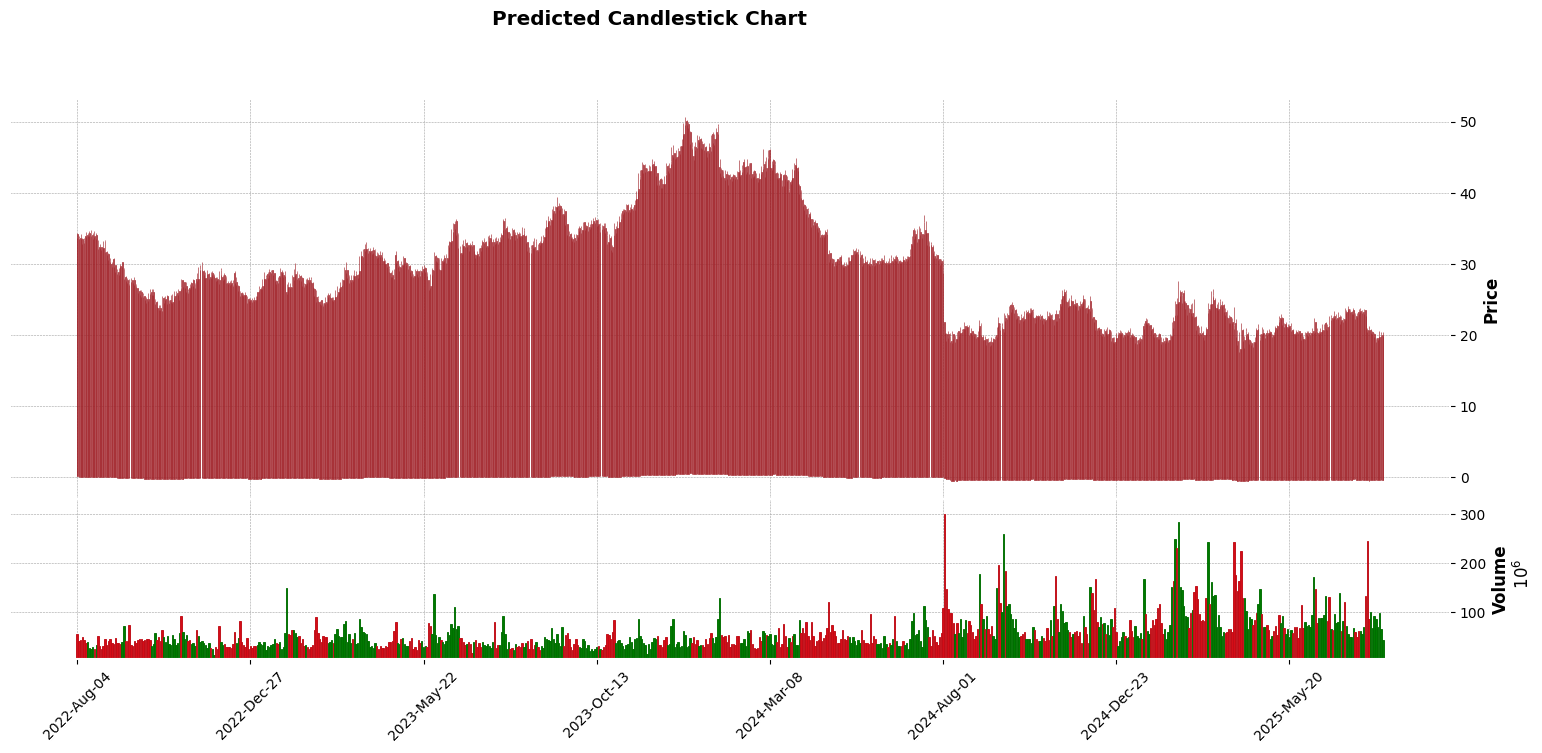

In [38]:
import mplfinance as mpf
predicted_prices = model.predict(X_test)
predicted_df = df.iloc[-len(predicted_prices):].copy()
predicted_df['Predicted Close'] = predicted_prices
predicted_df['Open'] = predicted_df['Open']
predicted_df['High'] = predicted_df['High']
predicted_df['Low'] = predicted_df['Low']
predicted_df['Close'] = predicted_df['Predicted Close']
final_df = predicted_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
final_df.index = pd.to_datetime(predicted_df.index)

mpf.plot(
    final_df,
    type='candle',
    volume=True,
    style='charles',
    title='Predicted Candlestick Chart',
    ylabel='Price',
    ylabel_lower='Volume',
    figsize=(20, 8)
)

In [39]:
df = df.reset_index()

In [40]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
final_df = df[['Open', 'High', 'Low', 'Close']]

candlestick_trace = go.Candlestick(
    x = final_df.index,
    open=final_df['Open'],
    high=final_df['High'],
    low=final_df['Low'],
    close=final_df['Close'],
    name='Candlestick',
    increasing_line_color="#0c9115",
    decreasing_line_color="#ff0000"
)

fig = go.Figure(data=[candlestick_trace])

fig.update_layout(
    title="Predicted Candlestick Chart",
    xaxis_title="Days",
    yaxis_title="Prices",
    template="plotly_white",
    height=600,
    width=1500,
    xaxis_rangeslider_visible=False,
    hovermode='x unified',
    font=dict(family="Arial Black", size=14, color="#000000"),
    margin=dict(l=60, r=30, t=60, b=60),
    plot_bgcolor='rgba(255, 255, 255, 0.95)'
)

fig.update_xaxes(
    tickformat='%d-%m-%Y',
    showgrid=True,
    gridcolor='lightgray',
    ticks='outside'
)

fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgray',
    ticks='outside'
)

fig.show()

### Predicting the next 10 days

In [41]:
latest_prediction = []
last_seq = X_test[:-1]

for _ in range(10):
    prediction = model.predict(last_seq)
    latest_prediction.append(prediction)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [42]:
df = df.reset_index()

predicted_data_next_10_days = np.array(latest_prediction).reshape(-1, 5)
last_date = df["Date"].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

features = ['Open', 'High', 'Low', 'Volume', 'Close']
colors = ['#2a9d8f', "#c2d516", "#26C426", '#f4a261', "#1c6ee1"]

for i, feature_name in enumerate(features):
    fig_plotly = go.Figure()

    fig_plotly.add_trace(go.Scatter(
        x=next_10_days,
        y=predicted_data_next_10_days[:, i],
        mode='lines+markers',
        name=f'Predicted {feature_name.capitalize()}',
        line=dict(color=colors[i], width=2),
        marker=dict(size=6)
    ))

    fig_plotly.update_layout(
        title=f'Predicted {feature_name.capitalize()} for the next 10 days',
        xaxis_title='Date',
        yaxis_title=f'{feature_name.capitalize()}',
        plot_bgcolor='rgba(255, 255, 255, 0.95)',
        paper_bgcolor='rgba(245, 245, 245, 1)',
        font=dict(family='Arial', size=14, color='#000000'),
        height=600,
        width=1450,
        xaxis=dict(showgrid=True, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridcolor='lightgray'),
        margin=dict(l=50, r=30, t=60, b=50),
        hovermode='x unified',
        showlegend=False
    )

    fig_plotly.update_xaxes(tickformat='%d-%m-%Y')

    fig_plotly.show()



# Modeling with Pytorch

## Loading Dataset and Preprocessing


In [61]:
tck = yf.Ticker("INTC")
start_Data = "1995-08-1"

df5 = tck.history(start = start_Data, end = None)
df5

Open       High        Low      Close  \
Date                                                                    
1995-08-01 00:00:00-04:00   4.579953   4.579953   4.403801   4.456647   
1995-08-02 00:00:00-04:00   4.535917   4.579955   4.298111   4.333342   
1995-08-03 00:00:00-04:00   4.210034   4.421416   4.165996   4.377378   
1995-08-04 00:00:00-04:00   4.386185   4.439030   4.350954   4.368569   
1995-08-07 00:00:00-04:00   4.403799   4.500682   4.386183   4.474259   
...                              ...        ...        ...        ...   
2025-08-01 00:00:00-04:00  19.500000  19.549999  18.969999  19.309999   
2025-08-04 00:00:00-04:00  19.520000  19.590000  19.350000  19.500000   
2025-08-05 00:00:00-04:00  19.700001  20.540001  19.680000  20.190001   
2025-08-06 00:00:00-04:00  20.120001  20.480000  19.870001  20.410000   
2025-08-07 00:00:00-04:00  19.990000  20.440001  19.680000  19.790001   

                              Volume  Dividends  Stock Splits  
Date                                                           
1995-08-01 00:00:00-04:00   94556800        0.0           0.0  
1995-08-02 00:00:00-04:00  135620800        0.0           0.0  
1995-08-03 00:00:00-04:00  117961600        0.0           0.0  
1995-08-04 00:00:00-04:00   68723200        0.0           0.0  
1995-08-07 00:00:00-04:00   51580000        0.0           0.0  
...                              ...        ...           ...  
2025-08-01 00:00:00-04:00   86496100        0.0           0.0  
2025-08-04 00:00:00-04:00   69249400        0.0           0.0  
2025-08-05 00:00:00-04:00   97338200        0.0           0.0  
2025-08-06 00:00:00-04:00   65327400        0.0           0.0  
2025-08-07 00:00:00-04:00   87532911        0.0           0.0  

[7555 rows x 7 columns]

In [62]:
df5['Volume'] = df5['Volume'].astype('float64')

In [63]:
df5 = df5.reset_index()
sma_days = [10, 20, 50]

for sma in sma_days:
    col_name = f'SMA_{sma}Days'

    df5[col_name] = df5['Close'].rolling(window=sma).mean()

    df5[col_name] = df5[col_name].fillna(df5['Close'])

df5.head(15)

Date      Open      High       Low     Close  \
0  1995-08-01 00:00:00-04:00  4.579953  4.579953  4.403801  4.456647   
1  1995-08-02 00:00:00-04:00  4.535917  4.579955  4.298111  4.333342   
2  1995-08-03 00:00:00-04:00  4.210034  4.421416  4.165996  4.377378   
3  1995-08-04 00:00:00-04:00  4.386185  4.439030  4.350954  4.368569   
4  1995-08-07 00:00:00-04:00  4.403799  4.500682  4.386183  4.474259   
5  1995-08-08 00:00:00-04:00  4.527106  4.597566  4.500683  4.562336   
6  1995-08-09 00:00:00-04:00  4.694454  4.703262  4.615186  4.659224   
7  1995-08-10 00:00:00-04:00  4.659221  4.668028  4.500684  4.527107   
8  1995-08-11 00:00:00-04:00  4.632801  4.685647  4.588763  4.659224   
9  1995-08-14 00:00:00-04:00  4.650416  4.720876  4.606378  4.676838   
10 1995-08-15 00:00:00-04:00  4.720874  4.738489  4.553529  4.615182   
11 1995-08-16 00:00:00-04:00  4.668027  4.729680  4.579951  4.703258   
12 1995-08-17 00:00:00-04:00  4.720875  4.729683  4.610781  4.623991   
13 1995-08-18 00:00:00-04:00  4.668029  4.668029  4.544722  4.571145   
14 1995-08-21 00:00:00-04:00  4.571142  4.579950  4.218838  4.245261   

         Volume  Dividends  Stock Splits  SMA_10Days  SMA_20Days  SMA_50Days  
0    94556800.0        0.0           0.0    4.456647    4.456647    4.456647  
1   135620800.0        0.0           0.0    4.333342    4.333342    4.333342  
2   117961600.0        0.0           0.0    4.377378    4.377378    4.377378  
3    68723200.0        0.0           0.0    4.368569    4.368569    4.368569  
4    51580000.0        0.0           0.0    4.474259    4.474259    4.474259  
5    58122400.0        0.0           0.0    4.562336    4.562336    4.562336  
6    70807200.0        0.0           0.0    4.659224    4.659224    4.659224  
7    60408000.0        0.0           0.0    4.527107    4.527107    4.527107  
8    68375200.0        0.0           0.0    4.659224    4.659224    4.659224  
9    50202400.0        0.0           0.0    4.509492    4.676838    4.676838  
10   67754400.0        0.0           0.0    4.525346    4.615182    4.615182  
11   67332800.0        0.0           0.0    4.562338    4.703258    4.703258  
12   66123200.0        0.0           0.0    4.586999    4.623991    4.623991  
13   73496800.0        0.0           0.0    4.607257    4.571145    4.571145  
14  175418400.0        0.0           0.0    4.584357    4.245261    4.245261

In [64]:
ten_days = df5[['Open', 'High', 'Low', 'Volume', 'SMA_10Days', 'Close']].copy()

twenty_days= df5[['Open', 'High', 'Low', 'Volume', 'SMA_20Days', 'Close']].copy()

all_sma = df5[['Open', 'High', 'Low', 'Volume', 'SMA_10Days', 'SMA_20Days', 'Close']].copy()

In [65]:
def scale_dataframe(df, columns, base_columns='Low', feature_range=(0, 2)):
    scaler=MinMaxScaler(feature_range=feature_range).fit(df[base_columns].values.reshape(-1, 1))
    for col in columns:
        df[col] = scaler.transform(df[col].values.reshape(-1, 1))
    return df

column_10days = ['Open', 'High', 'Low', 'Volume', 'Close', 'SMA_10Days']
column_20days = ['Open', 'High', 'Low', 'Volume', 'Close', 'SMA_20Days']
column_both_10days_and_20days = ['Open', 'High', 'Low', 'Volume', 'Close', 'SMA_10Days', 'SMA_20Days']

ten_days = scale_dataframe(ten_days, column_10days)
twenty_days = scale_dataframe(twenty_days, column_20days)
all_sma = scale_dataframe(all_sma, column_both_10days_and_20days)

In [66]:
data_10days = ten_days[['Open', 'High', 'Low', 'SMA_10Days', 'Close']].values
data_20days = twenty_days[['Open', 'High', 'Low', 'SMA_20Days', 'Close']].values
data_all = all_sma[['Open', 'High', 'Low', 'SMA_10Days', 'SMA_20Days', 'Close']].values

In [67]:
print(data_10days.shape)
print(data_20days.shape)
print(data_all.shape)

(7555, 5)
(7555, 5)
(7555, 6)


In [68]:
seq_len = 11

sequence_10days = []
for i in range(len(data_10days) - seq_len + 1):
    sequence_10days.append(data_10days[i: i + seq_len])
sequence_10days = np.array(sequence_10days)
print("10 days SMA sequence shape: ", sequence_10days.shape)

sequence_20days = []
for i in range(len(data_20days) - seq_len + 1):
    sequence_20days.append(data_10days[i: i + seq_len])
sequence_20days = np.array(sequence_20days)
print("20 days SMA sequence shape: ", sequence_20days.shape)

sequence_all = []
for i in range(len(data_all) - seq_len + 1):
    sequence_all.append(data_all[i: i + seq_len])
sequence_all = np.array(sequence_all)
print("Both SMAs sequence shape: ", sequence_all.shape)

10 days SMA sequence shape:  (7545, 11, 5)
20 days SMA sequence shape:  (7545, 11, 5)
Both SMAs sequence shape:  (7545, 11, 6)


In [69]:
train_data_10days, test_data_10days, val_data_10days = split_data(sequence_10days)
train_data_20days, test_data_20days, val_data_20days = split_data(sequence_20days)
train_data_all, test_data_all, val_data_all = split_data(sequence_all)

In [70]:
print("Shapes:")
print("10 days SMA sequence:")
print(" Train:      ", train_data_10days.shape)
print(" Validation: ", val_data_10days.shape)
print(" Test:       ", test_data_10days.shape)

print("20 days SMA sequence:")
print(" Train:      ", train_data_20days.shape)
print(" Validation: ", val_data_20days.shape)
print(" Test:       ", test_data_20days.shape)

print("Both SMAs sequence:")
print(" Train:      ", train_data_all.shape)
print(" Validation: ", val_data_all.shape)
print(" Test:       ", test_data_all.shape)


Shapes:
10 days SMA sequence:
 Train:       (6036, 11, 5)
 Validation:  (754, 11, 5)
 Test:        (755, 11, 5)
20 days SMA sequence:
 Train:       (6036, 11, 5)
 Validation:  (754, 11, 5)
 Test:        (755, 11, 5)
Both SMAs sequence:
 Train:       (6036, 11, 6)
 Validation:  (754, 11, 6)
 Test:        (755, 11, 6)


In [72]:
def split_Xy(dataset):
    X = dataset[:, :-1, :]
    y = dataset[:, -1, -1]
    return X, y

X_train_10days, y_train_10days = split_Xy(train_data_10days)
X_test_10days, y_test_10days = split_Xy(test_data_10days)
X_val_10days, y_val_10days = split_Xy(val_data_10days)

X_train_20days, y_train_20days = split_Xy(train_data_20days)
X_test_20days, y_test_20days = split_Xy(test_data_20days)
X_val_20days, y_val_20days = split_Xy(val_data_20days)

X_train_all, y_train_all = split_Xy(train_data_all)
X_test_all, y_test_all = split_Xy(test_data_all)
X_val_all, y_val_all = split_Xy(val_data_all)
